# Cricket Worldcup 2023 EDA
### 1. Understanding the dataset

In [2]:
#Importing Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Doing some settings


plt.style.use("ggplot")
pd.set_option("display.max_columns",200)

In [4]:
#Importing dataset

df=pd.read_csv('CWC23_all_innings.csv')
df.head(5)

,team,player,bat_or_bowl,bb_bf,runs,wkts,wicketball_prob,runs_per_ball,opposition,ground,start_date,overs,mdns,econ,inns,4s,6s,sr,not_out,mins
0,PAK,Shaheen Shah Afridi (PAK),bowl,60,45,3.0,0.05,0.750000,v South Africa,Chennai,27-Oct-23,10.0,0.0,4.5,2,NaN,NaN,NaN,NaN,NaN
1,ENG,DJ Willey (ENG),bowl,60,45,3.0,0.05,0.750000,v India,Lucknow,29-Oct-23,10.0,2.0,4.5,1,NaN,NaN,NaN,NaN,NaN
2,NZ,MJ Henry (NZ),bowl,60,48,3.0,0.05,0.800000,v England,Ahmedabad,5-Oct-23,10.0,1.0,4.8,1,NaN,NaN,NaN,NaN,NaN
3,NZ,LH Ferguson (NZ),bowl,60,49,3.0,0.05,0.816667,v Bangladesh,Chennai,13-Oct-23,10.0,0.0,4.9,1,NaN,NaN,NaN,NaN,NaN
4,AFG,Noor Ahmad (AFG),bowl,60,49,3.0,0.05,0.816667,v Pakistan,Chennai,23-Oct-23,10.0,0.0,4.9,1,NaN,NaN,NaN,NaN,NaN


In [5]:
df.shape

(1408, 20)

In [6]:
#More Info about dataset

df.describe()

,bb_bf,runs,wkts,wicketball_prob,runs_per_ball,overs,mdns,econ,inns,4s,6s,sr,not_out,mins
count,1408.000000,1408.000000,562.000000,1408.000000,1408.000000,562.000000,562.000000,562.000000,1408.000000,846.000000,846.000000,846.000000,846.000000,846.000000
mean,35.305398,33.237216,1.204626,0.070574,0.898755,7.342527,0.256228,5.946637,1.470881,2.605201,0.751773,83.716596,0.151300,42.721040
std,25.248709,28.056329,1.198237,0.152535,0.471051,2.679736,0.532547,2.141566,0.499329,3.146922,1.504184,52.475444,0.358553,41.576908
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.300000,0.000000,1.350000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.750000,11.000000,0.000000,0.010724,0.621350,5.550000,0.000000,4.500000,1.000000,0.000000,0.000000,51.610000,0.000000,12.000000
50%,32.000000,29.000000,1.000000,0.032258,0.879005,8.000000,0.000000,5.675000,1.000000,2.000000,0.000000,81.810000,0.000000,28.000000
75%,54.000000,49.000000,2.000000,0.062500,1.130819,10.000000,0.000000,7.120000,2.000000,4.000000,1.000000,107.020000,0.000000,60.000000
max,143.000000,201.000000,7.000000,1.000000,6.000000,10.000000,3.000000,16.000000,2.000000,21.000000,11.000000,600.000000,1.000000,217.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1408 entries, 0 to 1407
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   team             1408 non-null   object 
 1   player           1408 non-null   object 
 2   bat_or_bowl      1408 non-null   object 
 3   bb_bf            1408 non-null   int64  
 4   runs             1408 non-null   int64  
 5   wkts             562 non-null    float64
 6   wicketball_prob  1408 non-null   float64
 7   runs_per_ball    1408 non-null   float64
 8   opposition       1408 non-null   object 
 9   ground           1408 non-null   object 
 10  start_date       1408 non-null   object 
 11  overs            562 non-null    float64
 12  mdns             562 non-null    float64
 13  econ             562 non-null    float64
 14  inns             1408 non-null   int64  
 15  4s               846 non-null    float64
 16  6s               846 non-null    float64
 17  sr            

In [8]:
df.isnull().sum()

team                 0
player               0
bat_or_bowl          0
bb_bf                0
runs                 0
wkts               846
wicketball_prob      0
runs_per_ball        0
opposition           0
ground               0
start_date           0
overs              846
mdns               846
econ               846
inns                 0
4s                 562
6s                 562
sr                 562
not_out            562
mins               562
dtype: int64

### We have a lot of missing values in the dataset
### All other NAN value cols are either batsman metrics or Bowler Metrics except "mins" column. Let's check it's correlation first.

In [9]:
col_to_check = ['mins'] 

missing_values = df[col_to_check].isnull()
print(missing_values.sum())

df[missing_values.any(axis=1)]

mins    562
dtype: int64


,team,player,bat_or_bowl,bb_bf,runs,wkts,wicketball_prob,runs_per_ball,opposition,ground,start_date,overs,mdns,econ,inns,4s,6s,sr,not_out,mins
0,PAK,Shaheen Shah Afridi (PAK),bowl,60,45,3.0,0.05,0.750000,v South Africa,Chennai,27-Oct-23,10.0,0.0,4.50,2,NaN,NaN,NaN,NaN,NaN
1,ENG,DJ Willey (ENG),bowl,60,45,3.0,0.05,0.750000,v India,Lucknow,29-Oct-23,10.0,2.0,4.50,1,NaN,NaN,NaN,NaN,NaN
2,NZ,MJ Henry (NZ),bowl,60,48,3.0,0.05,0.800000,v England,Ahmedabad,5-Oct-23,10.0,1.0,4.80,1,NaN,NaN,NaN,NaN,NaN
3,NZ,LH Ferguson (NZ),bowl,60,49,3.0,0.05,0.816667,v Bangladesh,Chennai,13-Oct-23,10.0,0.0,4.90,1,NaN,NaN,NaN,NaN,NaN
4,AFG,Noor Ahmad (AFG),bowl,60,49,3.0,0.05,0.816667,v Pakistan,Chennai,23-Oct-23,10.0,0.0,4.90,1,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1403,NZ,MJ Santner (NZ),bowl,60,51,0.0,0.00,0.850000,v India,Wankhede,15-Nov-23,10.0,1.0,5.10,1,NaN,NaN,NaN,NaN,NaN
1404,AUS,A Zampa (AUS),bowl,42,55,0.0,0.00,1.309524,v South Africa,Eden Gardens,16-Nov-23,7.0,0.0,7.85,1,NaN,NaN,NaN,NaN,NaN
1405,NZ,R Ravindra (NZ),bowl,42,60,0.0,0.00,1.428571,v India,Wankhede,15-Nov-23,7.0,0.0,8.57,1,NaN,NaN,NaN,NaN,NaN
1406,IND,RA Jadeja (IND),bowl,60,63,0.0,0.00,1.050000,v New Zealand,Wankhede,15-Nov-23,10.0,0.0,6.30,2,NaN,NaN,NaN,NaN,NaN


In [10]:
print("Missing values in 'mins':", df['mins'].isnull().sum())

correlation_matrix = df[['mins', 'runs', 'sr', 'overs', 'wkts', 'econ']].corr() 
mins_correlations = correlation_matrix['mins']
print("Correlations with 'mins' (absolute values):")
print(mins_correlations.abs())

Missing values in 'mins': 562
Correlations with 'mins' (absolute values):
mins     1.000000
runs     0.914893
sr       0.185547
overs         NaN
wkts          NaN
econ          NaN
Name: mins, dtype: float64


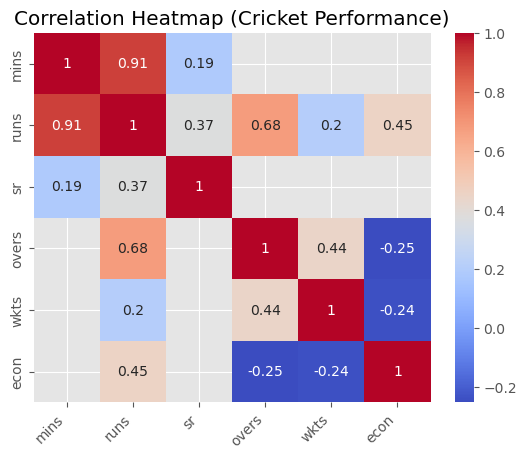

In [11]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm') 
plt.title("Correlation Heatmap (Cricket Performance)")
plt.xticks(rotation=45, ha='right')  
plt.show()

### As mins have a corr with runs only , and does not have any effect on any other metric, this column does not seem to be important for the EDA

In [12]:
#Dropping min col

df=df.drop(columns='mins')
df

,team,player,bat_or_bowl,bb_bf,runs,wkts,wicketball_prob,runs_per_ball,opposition,ground,start_date,overs,mdns,econ,inns,4s,6s,sr,not_out
0,PAK,Shaheen Shah Afridi (PAK),bowl,60,45,3.0,0.05,0.750000,v South Africa,Chennai,27-Oct-23,10.0,0.0,4.50,2,NaN,NaN,NaN,NaN
1,ENG,DJ Willey (ENG),bowl,60,45,3.0,0.05,0.750000,v India,Lucknow,29-Oct-23,10.0,2.0,4.50,1,NaN,NaN,NaN,NaN
2,NZ,MJ Henry (NZ),bowl,60,48,3.0,0.05,0.800000,v England,Ahmedabad,5-Oct-23,10.0,1.0,4.80,1,NaN,NaN,NaN,NaN
3,NZ,LH Ferguson (NZ),bowl,60,49,3.0,0.05,0.816667,v Bangladesh,Chennai,13-Oct-23,10.0,0.0,4.90,1,NaN,NaN,NaN,NaN
4,AFG,Noor Ahmad (AFG),bowl,60,49,3.0,0.05,0.816667,v Pakistan,Chennai,23-Oct-23,10.0,0.0,4.90,1,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1403,NZ,MJ Santner (NZ),bowl,60,51,0.0,0.00,0.850000,v India,Wankhede,15-Nov-23,10.0,1.0,5.10,1,NaN,NaN,NaN,NaN
1404,AUS,A Zampa (AUS),bowl,42,55,0.0,0.00,1.309524,v South Africa,Eden Gardens,16-Nov-23,7.0,0.0,7.85,1,NaN,NaN,NaN,NaN
1405,NZ,R Ravindra (NZ),bowl,42,60,0.0,0.00,1.428571,v India,Wankhede,15-Nov-23,7.0,0.0,8.57,1,NaN,NaN,NaN,NaN
1406,IND,RA Jadeja (IND),bowl,60,63,0.0,0.00,1.050000,v New Zealand,Wankhede,15-Nov-23,10.0,0.0,6.30,2,NaN,NaN,NaN,NaN


## Separating dataset  into 3 

In [13]:
df.columns

Index(['team', 'player', 'bat_or_bowl', 'bb_bf', 'runs', 'wkts',
       'wicketball_prob', 'runs_per_ball', 'opposition', 'ground',
       'start_date', 'overs', 'mdns', 'econ', 'inns', '4s', '6s', 'sr',
       'not_out'],
      dtype='object')

In [14]:
batsman_cols = ['team', 'player','bat_or_bowl', 'bb_bf','runs', 'runs_per_ball', 'inns', '4s', '6s', 'sr', 'not_out']
bowler_cols = ['team', 'player', 'bb_bf','bat_or_bowl', 'wkts', 'overs', 'mdns', 'econ']
team_df_cols = ['team', 'opposition', 'ground', 'start_date']


batsman_df = df[df['bat_or_bowl'] == 'bat'][batsman_cols]
bowler_df = df[df['bat_or_bowl'] == 'bowl'][bowler_cols]

team_df = df[team_df_cols]

if 'bat_or_bowl' in df.columns:
    
  unknown_role_df = df[df['bat_or_bowl'].isnull()]
  
  if not unknown_role_df.empty:
    team_df = pd.concat([team_df, unknown_role_df[team_df_cols]], ignore_index=True)


In [15]:
print("Batsman Dataframe:")
batsman_df

Batsman Dataframe:


,team,player,bat_or_bowl,bb_bf,runs,runs_per_ball,inns,4s,6s,sr,not_out
501,AUS,GJ Maxwell (AUS),bat,128,201,1.5703,2,21.0,10.0,157.03,1.0
502,SA,Q de Kock (SA),bat,140,174,1.2428,1,15.0,7.0,124.28,0.0
503,AUS,DA Warner (AUS),bat,124,163,1.3145,1,14.0,9.0,131.45,0.0
504,NZ,DP Conway (NZ),bat,121,152,1.2561,2,19.0,3.0,125.61,1.0
505,ENG,DJ Malan (ENG),bat,107,140,1.3084,1,16.0,5.0,130.84,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1380,AUS,GJ Maxwell (AUS),bat,5,1,0.2000,2,0.0,0.0,20.00,0.0
1381,NZ,TWM Latham (NZ),bat,2,0,0.0000,2,0.0,0.0,0.00,0.0
1382,SA,T Bavuma (SA),bat,4,0,0.0000,1,0.0,0.0,0.00,0.0
1383,SA,M Jansen (SA),bat,1,0,0.0000,1,0.0,0.0,0.00,0.0


In [16]:
batsman_df.isnull().sum()

team             0
player           0
bat_or_bowl      0
bb_bf            0
runs             0
runs_per_ball    0
inns             0
4s               0
6s               0
sr               0
not_out          0
dtype: int64

In [17]:
print("Bowler Dataframe:")
bowler_df

Bowler Dataframe:


,team,player,bb_bf,bat_or_bowl,wkts,overs,mdns,econ
0,PAK,Shaheen Shah Afridi (PAK),60,bowl,3.0,10.0,0.0,4.50
1,ENG,DJ Willey (ENG),60,bowl,3.0,10.0,2.0,4.50
2,NZ,MJ Henry (NZ),60,bowl,3.0,10.0,1.0,4.80
3,NZ,LH Ferguson (NZ),60,bowl,3.0,10.0,0.0,4.90
4,AFG,Noor Ahmad (AFG),60,bowl,3.0,10.0,0.0,4.90
...,...,...,...,...,...,...,...,...
1403,NZ,MJ Santner (NZ),60,bowl,0.0,10.0,1.0,5.10
1404,AUS,A Zampa (AUS),42,bowl,0.0,7.0,0.0,7.85
1405,NZ,R Ravindra (NZ),42,bowl,0.0,7.0,0.0,8.57
1406,IND,RA Jadeja (IND),60,bowl,0.0,10.0,0.0,6.30


In [18]:
bowler_df.isnull().sum()

team           0
player         0
bb_bf          0
bat_or_bowl    0
wkts           0
overs          0
mdns           0
econ           0
dtype: int64

## Batsmen Performance Evaluation

In [19]:
batsman_df

,team,player,bat_or_bowl,bb_bf,runs,runs_per_ball,inns,4s,6s,sr,not_out
501,AUS,GJ Maxwell (AUS),bat,128,201,1.5703,2,21.0,10.0,157.03,1.0
502,SA,Q de Kock (SA),bat,140,174,1.2428,1,15.0,7.0,124.28,0.0
503,AUS,DA Warner (AUS),bat,124,163,1.3145,1,14.0,9.0,131.45,0.0
504,NZ,DP Conway (NZ),bat,121,152,1.2561,2,19.0,3.0,125.61,1.0
505,ENG,DJ Malan (ENG),bat,107,140,1.3084,1,16.0,5.0,130.84,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1380,AUS,GJ Maxwell (AUS),bat,5,1,0.2000,2,0.0,0.0,20.00,0.0
1381,NZ,TWM Latham (NZ),bat,2,0,0.0000,2,0.0,0.0,0.00,0.0
1382,SA,T Bavuma (SA),bat,4,0,0.0000,1,0.0,0.0,0.00,0.0
1383,SA,M Jansen (SA),bat,1,0,0.0000,1,0.0,0.0,0.00,0.0


In [20]:
unique_players = batsman_df['player'].unique()
total_players = len(unique_players)

print("Total Unique Players:", total_players)

Total Unique Players: 146


In [21]:
batsman_df['strike_rate'] = (batsman_df['runs'] / batsman_df['bb_bf'])

batsman_df['batting_average'] = batsman_df['runs'] / batsman_df['inns']

In [22]:
# Player-wise descriptive statistics
player_stats = batsman_df.groupby('player')[['runs', 'batting_average', 'strike_rate', '4s', '6s']].describe()
print("Batting Statistics by Player:")
player_stats

Batting Statistics by Player:


runs                                                 \
                      count       mean        std  min    25%   50%    75%   
player                                                                       
A Dutt (NED)            9.0   7.777778   7.031674  1.0   1.00   9.0  10.00   
A Zampa (AUS)           6.0   8.000000  11.099550  0.0   1.00   3.5   9.75   
AAP Atkinson (ENG)      4.0   9.250000  17.192537  0.0   0.00   1.0  10.25   
AD Mathews (SL)         4.0  12.750000   9.639329  0.0   9.00  14.0  17.75   
AK Markram (SA)        10.0  40.600000  37.083090  1.0   9.25  33.5  59.00   
...                     ...        ...        ...  ...    ...   ...    ...   
Usama Mir (PAK)         1.0   0.000000        NaN  0.0   0.00   0.0   0.00   
V Kohli (IND)          10.0  71.100000  39.190277  0.0  52.00  86.5  99.50   
Vikramjit Singh (NED)   6.0  16.333333  19.500427  2.0   3.25   8.0  21.75   
W Barresi (NED)         4.0  20.750000  21.171915  1.0   3.25  20.5  38.00   
WA Young (NZ)           6.0  34.333333  25.081201  0.0  20.75  32.5  48.75   

                             batting_average                             \
                         max           count       mean        std  min   
player                                                                    
A Dutt (NED)            23.0             9.0   6.722222   7.259094  0.5   
A Zampa (AUS)           29.0             6.0   7.083333  11.029128  0.0   
AAP Atkinson (ENG)      35.0             4.0   4.875000   8.469307  0.0   
AD Mathews (SL)         23.0             4.0  11.250000  10.242884  0.0   
AK Markram (SA)        106.0            10.0  34.300000  33.918366  0.5   
...                      ...             ...        ...        ...  ...   
Usama Mir (PAK)          0.0             1.0   0.000000        NaN  0.0   
V Kohli (IND)          117.0            10.0  53.400000  38.375918  0.0   
Vikramjit Singh (NED)   52.0             6.0   8.916667   9.167424  2.0   
W Barresi (NED)         41.0             4.0  15.625000  18.723314  1.0   
WA Young (NZ)           70.0             6.0  28.916667  26.893153  0.0   

                                                    strike_rate            \
                          25%    50%     75%    max       count      mean   
player                                                                      
A Dutt (NED)            0.500   5.50   9.000   23.0         9.0  0.885887   
A Zampa (AUS)           1.000   3.25   5.875   29.0         6.0  0.752303   
AAP Atkinson (ENG)      0.000   1.00   5.875   17.5         4.0  0.916667   
AD Mathews (SL)         4.500  11.00  17.750   23.0         3.0  0.652403   
AK Markram (SA)         7.000  27.25  53.375  106.0        10.0  1.515288   
...                       ...    ...     ...    ...         ...       ...   
Usama Mir (PAK)         0.000   0.00   0.000    0.0         1.0  0.000000   
V Kohli (IND)          31.250  49.25  78.875  117.0        10.0  0.829610   
Vikramjit Singh (NED)   3.250   5.00  10.875   26.0         6.0  0.523691   
W Barresi (NED)         1.750  10.25  24.125   41.0         4.0  0.661694   
WA Young (NZ)          16.125  16.75  44.750   70.0         6.0  0.684189   

                                                                         \
                            std       min       25%       50%       75%   
player                                                                    
A Dutt (NED)           0.795312  0.125000  0.454545  0.500000  1.500000   
A Zampa (AUS)          0.547091  0.000000  0.396875  0.843750  1.000000   
AAP Atkinson (ENG)     1.067187  0.000000  0.000000  0.833333  1.750000   
AD Mathews (SL)        0.208833  0.480000  0.536296  0.592593  0.738604   
AK Markram (SA)        1.645138  0.333333  0.803329  0.966520  1.443182   
...                         ...       ...       ...       ...       ...   
Usama Mir (PAK)             NaN  0.000000  0.000000  0.000000  0.000000   
V Kohli (IND)          0.306538  0.000000  0.84825

In [23]:
top_runners= batsman_df.sort_values(by='runs',ascending=False)
top_10_runners=top_runners.head(10)
top_10_runners

,team,player,bat_or_bowl,bb_bf,runs,runs_per_ball,inns,4s,6s,sr,not_out,strike_rate,batting_average
501,AUS,GJ Maxwell (AUS),bat,128,201,1.570300,2,21.0,10.0,157.03,1.0,1.570312,100.5
1200,AUS,MR Marsh (AUS),bat,132,177,1.340909,2,17.0,9.0,134.09,1.0,1.340909,88.5
502,SA,Q de Kock (SA),bat,140,174,1.242800,1,15.0,7.0,124.28,0.0,1.242857,174.0
503,AUS,DA Warner (AUS),bat,124,163,1.314500,1,14.0,9.0,131.45,0.0,1.314516,163.0
504,NZ,DP Conway (NZ),bat,121,152,1.256100,2,19.0,3.0,125.61,1.0,1.256198,76.0
505,ENG,DJ Malan (ENG),bat,107,140,1.308400,1,16.0,5.0,130.84,0.0,1.308411,140.0
1348,NZ,DJ Mitchell (NZ),bat,119,134,1.126000,2,9.0,7.0,112.60,0.0,1.126050,67.0
506,SA,HE van der Dussen (SA),bat,118,133,1.127100,1,9.0,5.0,112.71,0.0,1.127119,133.0
508,IND,RG Sharma (IND),bat,84,131,1.559500,2,16.0,5.0,155.95,0.0,1.559524,65.5
507,PAK,Mohammad Rizwan (PAK),bat,121,131,1.082600,2,8.0,3.0,108.26,1.0,1.082645,65.5


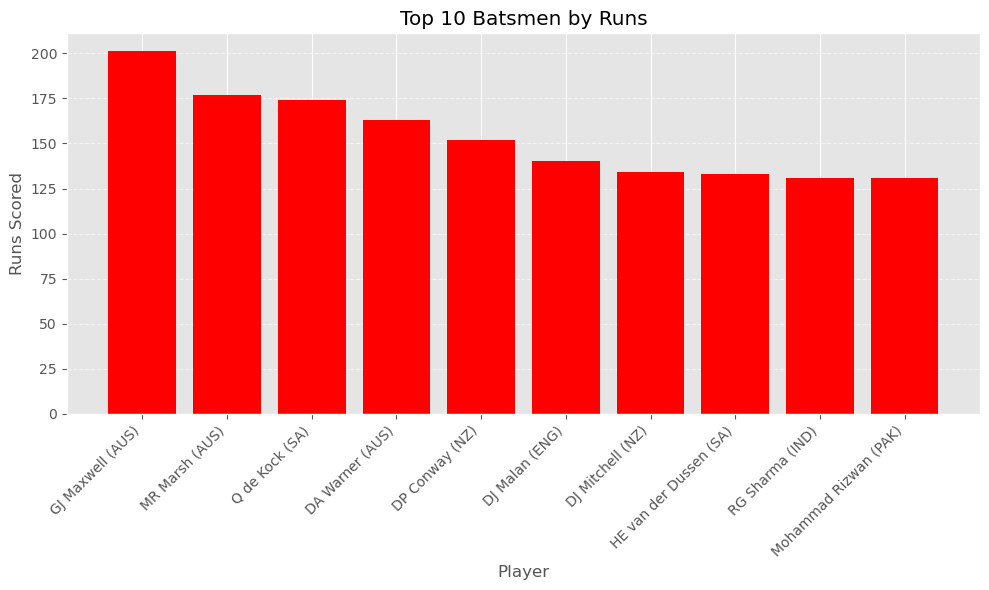

In [144]:
players1 = top_10_runners['player'].to_numpy() 
runs = top_10_runners['runs'].to_numpy()

plt.figure(figsize=(10, 6))  
plt.bar(players1, runs, color='red')  
plt.ylabel('Runs Scored') 
plt.xlabel('Player')  
plt.title('Top 10 Batsmen by Runs')  
plt.xticks(rotation=45, ha='right')  
plt.grid(axis='y', linestyle='--', alpha=0.6)  
plt.tight_layout()  
plt.show()


In [25]:
top_batting_avg= batsman_df.sort_values(by='batting_average',ascending=False)
top_10_batting_avg=top_batting_avg.head(10)
top_10_batting_avg

,team,player,bat_or_bowl,bb_bf,runs,runs_per_ball,inns,4s,6s,sr,not_out,strike_rate,batting_average
502,SA,Q de Kock (SA),bat,140,174,1.242800,1,15.0,7.0,124.28,0.0,1.242857,174.0
503,AUS,DA Warner (AUS),bat,124,163,1.314500,1,14.0,9.0,131.45,0.0,1.314516,163.0
505,ENG,DJ Malan (ENG),bat,107,140,1.308400,1,16.0,5.0,130.84,0.0,1.308411,140.0
506,SA,HE van der Dussen (SA),bat,118,133,1.127100,1,9.0,5.0,112.71,0.0,1.127119,133.0
509,NZ,DJ Mitchell (NZ),bat,127,130,1.023600,1,9.0,5.0,102.36,0.0,1.023622,130.0
510,AFG,Ibrahim Zadran (AFG),bat,143,129,0.902000,1,8.0,3.0,90.20,1.0,0.902098,129.0
1316,IND,SS Iyer (IND),bat,94,128,1.361702,1,10.0,5.0,136.17,1.0,1.361702,128.0
513,SL,BKG Mendis (SL),bat,77,122,1.584400,1,14.0,6.0,158.44,0.0,1.584416,122.0
514,AUS,MR Marsh (AUS),bat,108,121,1.120300,1,10.0,9.0,112.03,0.0,1.120370,121.0
1349,IND,V Kohli (IND),bat,113,117,1.035300,1,9.0,2.0,103.53,0.0,1.035398,117.0


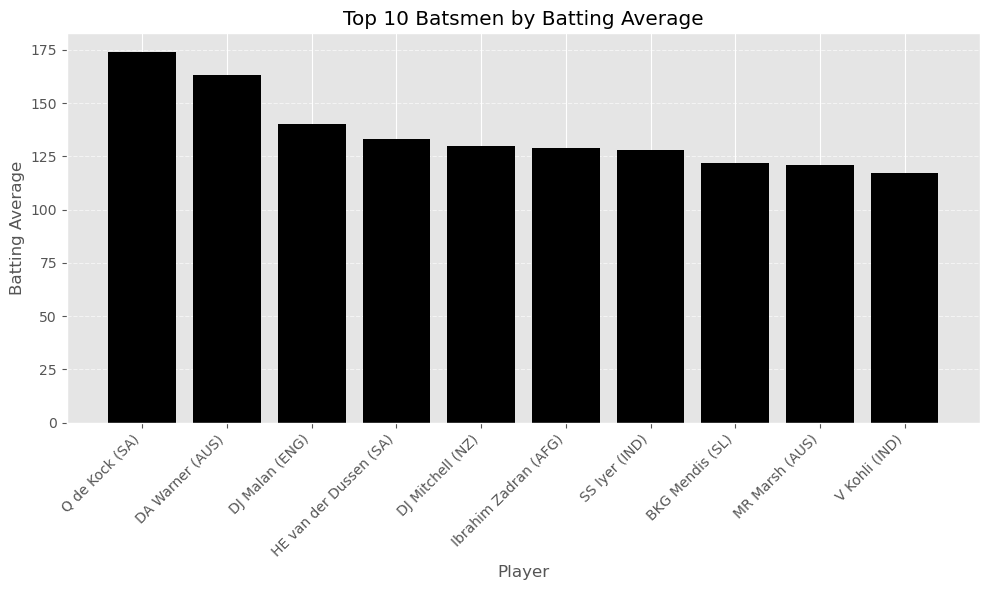

In [145]:
players2 = top_10_batting_avg['player'].to_numpy()
batting_average =top_10_batting_avg['batting_average'].to_numpy()

plt.figure(figsize=(10, 6))
plt.bar(players2, batting_average, color='black')  
plt.ylabel('Batting Average') 
plt.xlabel('Player') 
plt.title('Top 10 Batsmen by Batting Average') 
plt.xticks(rotation=45, ha='right') 
plt.grid(axis='y', linestyle='--', alpha=0.6)  
plt.tight_layout()
plt.show()


In [27]:
top_strike_rate= batsman_df.sort_values(by='strike_rate',ascending=False)
top_10_strike_rate=top_strike_rate.head(10)
top_10_strike_rate

,team,player,bat_or_bowl,bb_bf,runs,runs_per_ball,inns,4s,6s,sr,not_out,strike_rate,batting_average
1049,SA,AK Markram (SA),bat,1,6,6.0000,1,0.0,1.0,600.00,1.0,6.000000,6.0
1061,ENG,DJ Willey (ENG),bat,2,6,3.0000,1,0.0,1.0,300.00,0.0,3.000000,6.0
1223,ENG,DJ Willey (ENG),bat,5,15,3.0000,1,2.0,1.0,300.00,0.0,3.000000,15.0
693,AUS,PJ Cummins (AUS),bat,14,37,2.6428,1,2.0,4.0,264.28,0.0,2.642857,37.0
782,NED,A Dutt (NED),bat,9,23,2.5555,1,0.0,3.0,255.55,1.0,2.555556,23.0
654,ENG,MA Wood (ENG),bat,17,43,2.5294,2,2.0,5.0,252.94,1.0,2.529412,21.5
963,NZ,MJ Henry (NZ),bat,4,10,2.5000,1,0.0,1.0,250.00,1.0,2.500000,10.0
528,AUS,GJ Maxwell (AUS),bat,44,106,2.4090,1,9.0,8.0,240.90,0.0,2.409091,106.0
1041,BAN,Towhid Hridoy (BAN),bat,3,7,2.3333,1,0.0,1.0,233.33,0.0,2.333333,7.0
1030,BAN,Shoriful Islam (BAN),bat,3,7,2.3333,1,0.0,1.0,233.33,1.0,2.333333,7.0


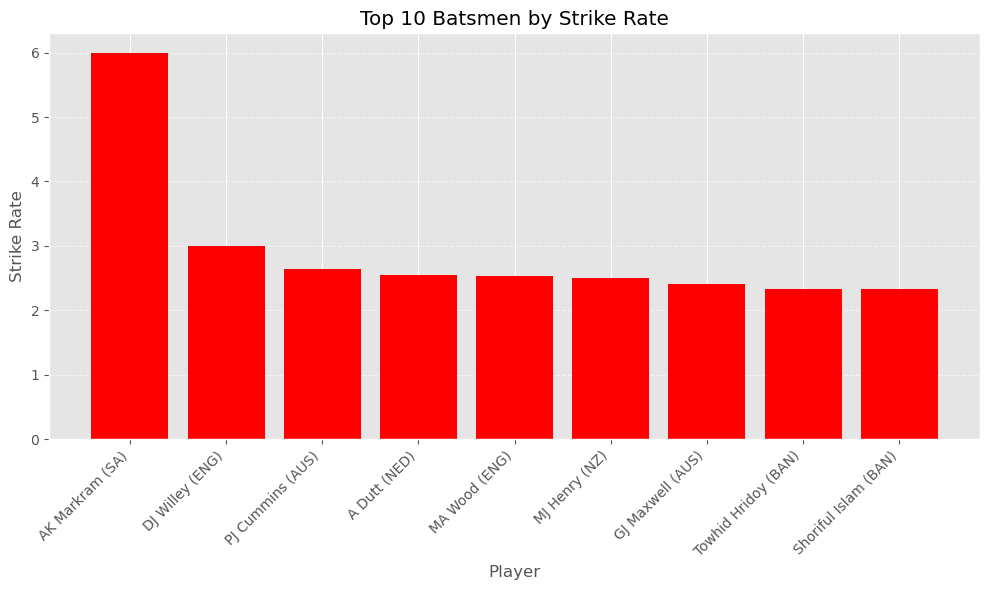

In [146]:
players3 = top_10_strike_rate['player'].to_numpy()
strike_rate = top_10_strike_rate['strike_rate'].to_numpy()

plt.figure(figsize=(10, 6))
plt.bar(players3, strike_rate, color='red') 
plt.ylabel('Strike Rate') 
plt.xlabel('Player')
plt.title('Top 10 Batsmen by Strike Rate')  
plt.xticks(rotation=45, ha='right')  
plt.grid(axis='y', linestyle='--', alpha=0.6)  
plt.tight_layout()
plt.show()

In [29]:
top_10_scorers = (
    batsman_df.groupby('player')['runs']
    .sum()  # Calculate total runs per player
    .sort_values(ascending=False)  # Sort by runs in descending order (highest first)
    .head(10)  # Select the top 10 players
)

print("Top 10 Batsmen by Total Runs:")
top_10_scorers

Top 10 Batsmen by Total Runs:


player
V Kohli (IND)             711
Q de Kock (SA)            594
R Ravindra (NZ)           578
DJ Mitchell (NZ)          552
RG Sharma (IND)           550
DA Warner (AUS)           528
SS Iyer (IND)             526
HE van der Dussen (SA)    448
MR Marsh (AUS)            426
AK Markram (SA)           406
Name: runs, dtype: int64

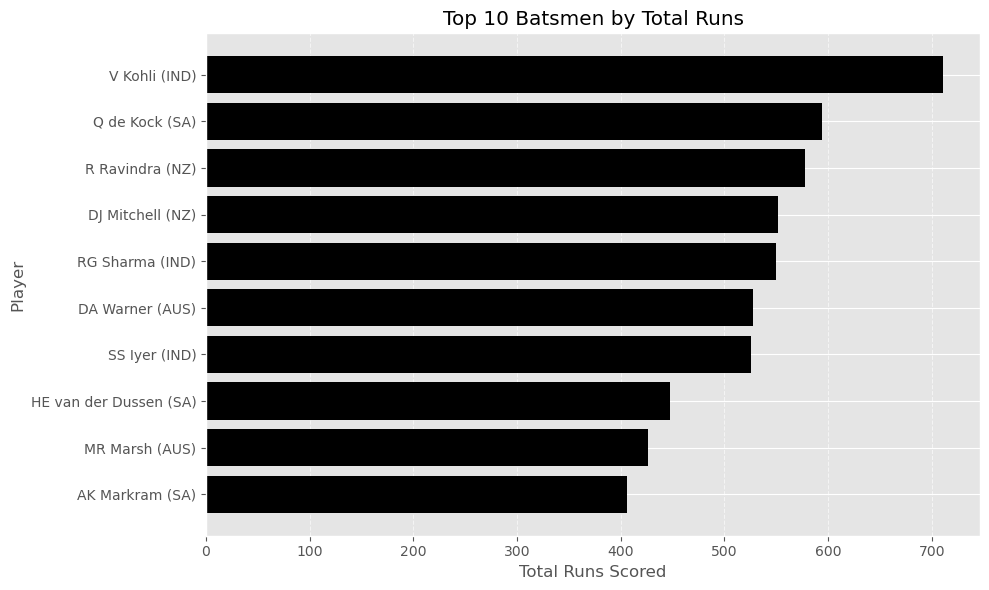

In [147]:
players4 = top_10_scorers.index.to_numpy() 
total_runs = top_10_scorers.to_numpy() 

plt.figure(figsize=(10, 6))  
plt.barh(players4, total_runs, color='black') 
plt.xlabel('Total Runs Scored')  
plt.ylabel('Player')  
plt.title('Top 10 Batsmen by Total Runs')  
plt.gca().invert_yaxis() 
plt.grid(axis='x', linestyle='--', alpha=0.6)  
plt.tight_layout()
plt.show()

In [31]:
batsman_df['impact_score'] = (batsman_df['runs'] * 0.4) + (batsman_df['batting_average'] * 0.3) + (batsman_df['strike_rate'] * 0.3)
top_impact_players = batsman_df.sort_values(by='impact_score', ascending=False)

print("Top Players by Potential Impact (Runs, Average, Strike Rate):")
top_10_impact_players=top_impact_players[['player', 'runs', 'batting_average', 'strike_rate', 'impact_score']].head(10)
top_10_impact_players

Top Players by Potential Impact (Runs, Average, Strike Rate):


,player,runs,batting_average,strike_rate,impact_score
502,Q de Kock (SA),174,174.0,1.242857,122.172857
503,DA Warner (AUS),163,163.0,1.314516,114.494355
501,GJ Maxwell (AUS),201,100.5,1.570312,111.021094
505,DJ Malan (ENG),140,140.0,1.308411,98.392523
1200,MR Marsh (AUS),177,88.5,1.340909,97.752273
506,HE van der Dussen (SA),133,133.0,1.127119,93.438136
509,DJ Mitchell (NZ),130,130.0,1.023622,91.307087
510,Ibrahim Zadran (AFG),129,129.0,0.902098,90.570629
1316,SS Iyer (IND),128,128.0,1.361702,90.008511
513,BKG Mendis (SL),122,122.0,1.584416,85.875325


C:\Users\hp\AppData\Local\Temp\ipykernel_5952\1259829109.py:14: MatplotlibDeprecationWarning:

Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.



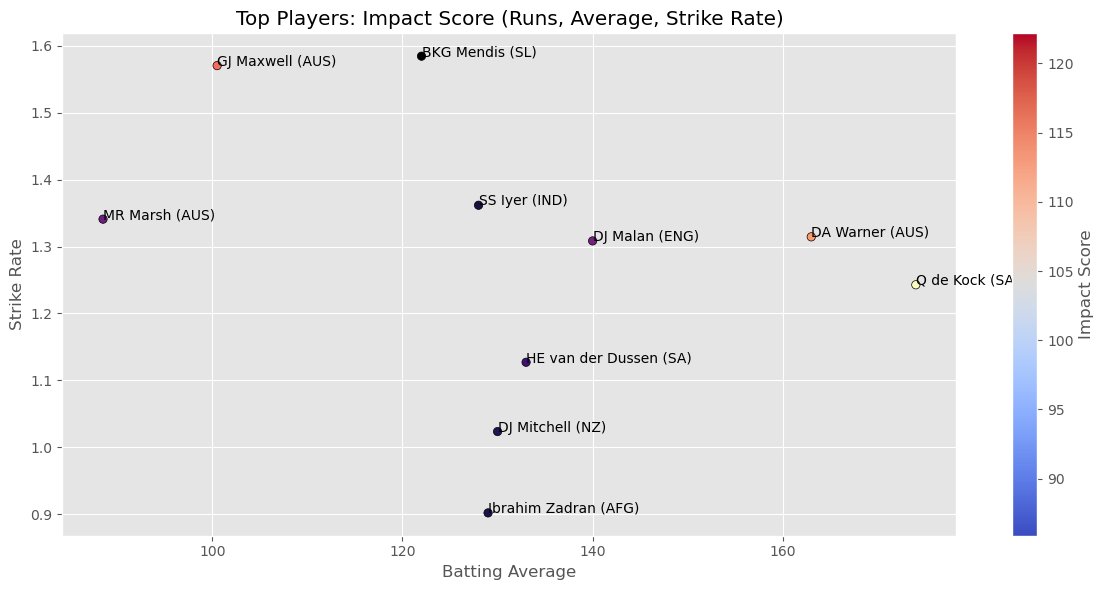

In [149]:
players5 = top_10_impact_players['player'].to_numpy()
impact_scores = top_10_impact_players['impact_score'].to_numpy()
batting_averages = top_10_impact_players['batting_average'].to_numpy()
strike_rates =top_10_impact_players['strike_rate'].to_numpy()

plt.figure(figsize=(12, 6))
plt.scatter(batting_averages, strike_rates, c=impact_scores, cmap='magma', edgecolors='black')  
plt.xlabel('Batting Average')
plt.ylabel('Strike Rate')
plt.title('Top Players: Impact Score (Runs, Average, Strike Rate)')

sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=plt.Normalize(min(impact_scores), max(impact_scores)))
sm.set_array([])
plt.colorbar(sm, label='Impact Score')

for i, txt in enumerate(players5):
    plt.annotate(txt, (batting_averages[i], strike_rates[i])) 
    
plt.tight_layout()
plt.show()

## Bowler Performance Evaluation

In [33]:
bowler_df

,team,player,bb_bf,bat_or_bowl,wkts,overs,mdns,econ
0,PAK,Shaheen Shah Afridi (PAK),60,bowl,3.0,10.0,0.0,4.50
1,ENG,DJ Willey (ENG),60,bowl,3.0,10.0,2.0,4.50
2,NZ,MJ Henry (NZ),60,bowl,3.0,10.0,1.0,4.80
3,NZ,LH Ferguson (NZ),60,bowl,3.0,10.0,0.0,4.90
4,AFG,Noor Ahmad (AFG),60,bowl,3.0,10.0,0.0,4.90
...,...,...,...,...,...,...,...,...
1403,NZ,MJ Santner (NZ),60,bowl,0.0,10.0,1.0,5.10
1404,AUS,A Zampa (AUS),42,bowl,0.0,7.0,0.0,7.85
1405,NZ,R Ravindra (NZ),42,bowl,0.0,7.0,0.0,8.57
1406,IND,RA Jadeja (IND),60,bowl,0.0,10.0,0.0,6.30


In [34]:
unique_bowlers = bowler_df['player'].unique()
total_bowlers  = len(unique_bowlers)

print("Total Unique Players:", total_bowlers)

Total Unique Players: 102


In [35]:
bowler_stats = bowler_df.groupby('player')

In [36]:
bowler_stats.describe()

bb_bf                                           \
                         count       mean        std   min    25%   50%   
player                                                                    
A Dutt (NED)               9.0  51.666667  11.202678  30.0  42.00  60.0   
A Zampa (AUS)             10.0  51.600000  13.623509  18.0  48.00  60.0   
AAP Atkinson (ENG)         3.0  48.000000   6.000000  42.0  45.00  48.0   
AD Mathews (SL)            5.0  26.600000  10.430724  18.0  18.00  24.0   
AK Markram (SA)            4.0  27.750000  14.974979  12.0  21.00  25.5   
...                        ...        ...        ...   ...    ...   ...   
Tanzim Hasan Sakib (BAN)   1.0  60.000000        NaN  60.0  60.00  60.0   
Taskin Ahmed (BAN)         7.0  47.142857  11.186727  36.0  36.00  48.0   
Usama Mir (PAK)            4.0  52.500000   5.744563  48.0  48.00  51.0   
V Kohli (IND)              2.0  10.500000  10.606602   3.0   6.75  10.5   
Vikramjit Singh (NED)      3.0  14.000000   9.165151   6.0   9.00  12.0   

                                       wkts                                 \
                            75%   max count      mean       std  min   25%   
player                                                                       
A Dutt (NED)              60.00  60.0   9.0  1.111111  1.054093  0.0  0.00   
A Zampa (AUS)             60.00  60.0  10.0  2.200000  1.619328  0.0  1.00   
AAP Atkinson (ENG)        51.00  54.0   3.0  1.333333  1.154701  0.0  1.00   
AD Mathews (SL)           30.00  43.0   5.0  1.200000  1.095445  0.0  0.00   
AK Markram (SA)           32.25  48.0   4.0  0.250000  0.500000  0.0  0.00   
...                         ...   ...   ...       ...       ...  ...   ...   
Tanzim Hasan Sakib (BAN)  60.00  60.0   1.0  3.000000       NaN  3.0  3.00   
Taskin Ahmed (BAN)        57.00  60.0   7.0  0.714286  0.755929  0.0  0.00   
Usama Mir (PAK)           55.50  60.0   4.0  1.000000  0.816497  0.0  0.75   
V Kohli (IND)             14.25  18.0   2.0  0.500000  0.707107  0.0  0.25   
Vikramjit Singh (NED)     18.00  24.0   3.0  0.000000  0.000000  0.0  0.00   

                                         overs                             \
                          50%   75%  max count       mean       std   min   
player                                                                      
A Dutt (NED)              1.0  2.00  3.0   9.0   8.588889  1.869789   5.0   
A Zampa (AUS)             2.5  3.75  4.0  10.0   8.600000  2.270585   3.0   
AAP Atkinson (ENG)        2.0  2.00  2.0   3.0   8.000000  1.000000   7.0   
AD Mathews (SL)           2.0  2.00  2.0   5.0   4.420000  1.712308   3.0   
AK Markram (SA)           0.0  0.25  1.0   4.0   4.575000  2.501166   2.0   
...                       ...   ...  ...   ...        ...       ...   ...   
Tanzim Hasan Sakib (BAN)  3.0  3.00  3.0   1.0  10.000000       NaN  10.0   
Taskin Ahmed (BAN)        1.0  1.00  2.0   7.0   7.857143  1.864454   6.0   
Usama Mir (PAK)           1.0  1.25  2.0   4.0   8.750000  0.957427   8.0   
V Kohli (IND)             0.5  0.75  1.0   2.0   1.650000  1.909188   0.3   
Vikramjit Singh (NED)     0.0  0.00  0.0   3.0   2.333333  1.527525   1.0   

                                                       mdns            \
                             25%    50%     75%   max count      mean   
player                                                                  
A Dutt (NED)               7.000  10.00  10.000  10.0   9.0  0.666667   
A Zampa (AUS)              8.000  10.00  10.000  10.0  10.0  0.100000   
AAP Atkinson (ENG)         7.500   8.00   8.500   9.0   3.0  0.000000   
AD Mathews (SL)            3.000   4.00   5.000   7.1   5.0  0.400000   
AK Markram (SA)            3.500   4.15   5.225   8.0   4.0  0.250000   
...                          ...    ...     ...   ...   ...       ...   
Tanzim Hasan Sakib (BAN)  10.000  10.00  10.000  10.0   1.0  0.000000   
Taskin Ahmed (BAN)         6.000   8.00   9.500  10.0   7.0  0.428571   

In [37]:
top_wicket_takers = (
    bowler_df.groupby('player')['wkts']
    .sum() 
    .sort_values(ascending=False)  
    .head(10)  
)

print("Top 10 Bowlers by Total Wickets Taken:")
print(top_wicket_takers)

Top 10 Bowlers by Total Wickets Taken:
player
Mohammed Shami (IND)         23.0
A Zampa (AUS)                22.0
D Madushanka (SL)            21.0
G Coetzee (SA)               20.0
JJ Bumrah (IND)              18.0
Shaheen Shah Afridi (PAK)    18.0
M Jansen (SA)                17.0
MJ Santner (NZ)              16.0
Haris Rauf (PAK)             16.0
RA Jadeja (IND)              16.0
Name: wkts, dtype: float64


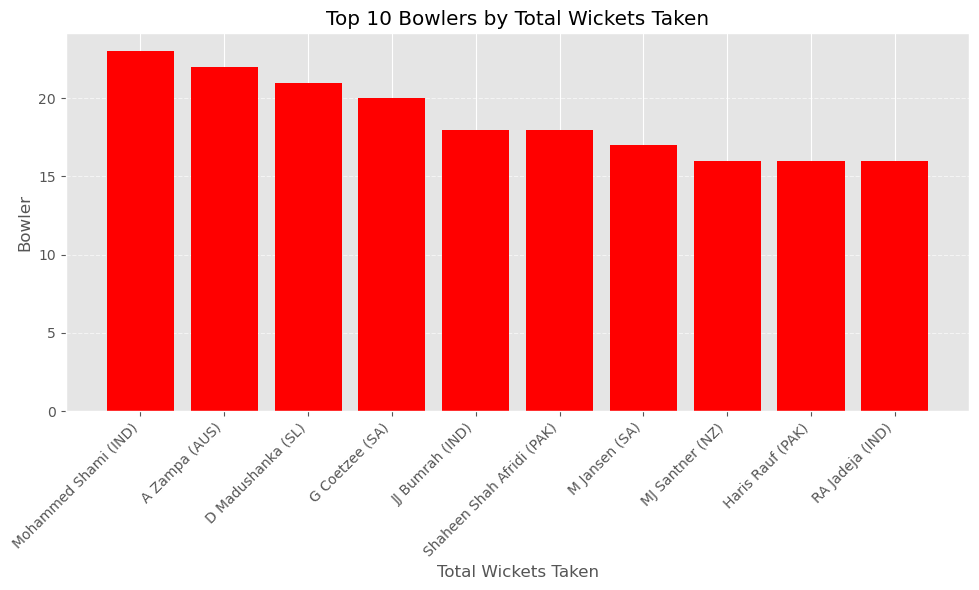

In [150]:
bowlers1 = top_wicket_takers.index.to_numpy()
total_wickets = top_wicket_takers.to_numpy() 

plt.figure(figsize=(10, 6)) 
plt.bar(bowlers1, total_wickets, color='red')
plt.xlabel('Total Wickets Taken') 
plt.ylabel('Bowler')  
plt.title('Top 10 Bowlers by Total Wickets Taken')  
plt.xticks(rotation=45, ha='right') 
plt.grid(axis='y', linestyle='--', alpha=0.6)  
plt.tight_layout() 
plt.show()


In [39]:
top_over_bowlers = (
    bowler_df.groupby('player')['overs']
    .sum() 
    .sort_values(ascending=False) 
    .head(10)  
)

print("Top 10 Bowlers by Total Overs Bowled:")
print(top_over_bowlers)

Top 10 Bowlers by Total Overs Bowled:
player
MJ Santner (NZ)           92.4
TA Boult (NZ)             91.0
KA Maharaj (SA)           89.0
Rashid Khan (AFG)         86.3
A Zampa (AUS)             86.0
Kuldeep Yadav (IND)       85.1
JR Hazlewood (AUS)        83.1
RA Jadeja (IND)           82.9
JJ Bumrah (IND)           82.5
Mujeeb Ur Rahman (AFG)    81.5
Name: overs, dtype: float64


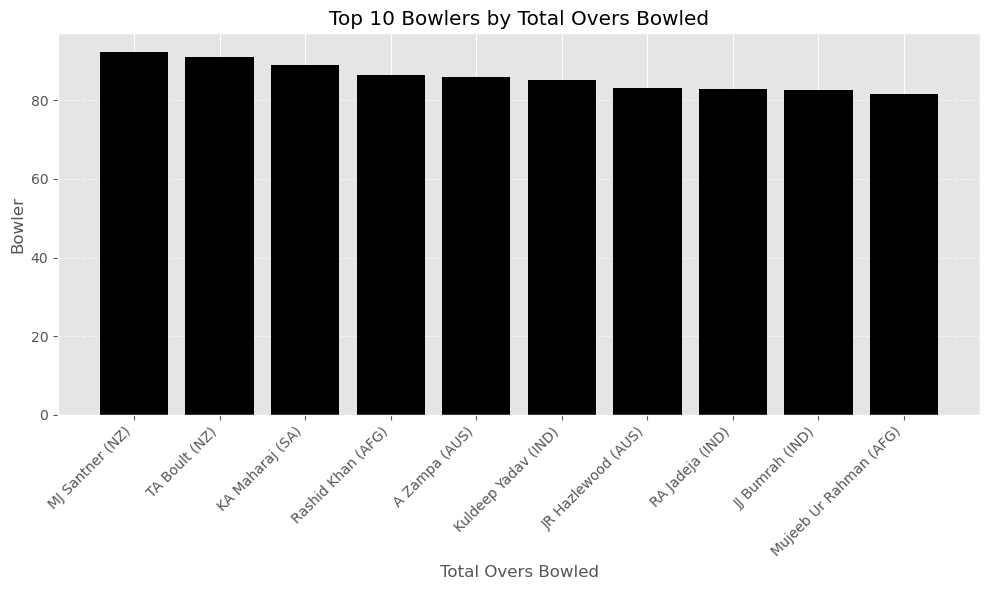

In [151]:
bowlers2 = top_over_bowlers.index.to_numpy()  
total_overs = top_over_bowlers.to_numpy() 

plt.figure(figsize=(10, 6))  
plt.bar(bowlers2, total_overs, color='black') 
plt.xlabel('Total Overs Bowled')  
plt.ylabel('Bowler')  
plt.title('Top 10 Bowlers by Total Overs Bowled') 
plt.xticks(rotation=45, ha='right')  
plt.grid(axis='y', linestyle='--', alpha=0.6)  
plt.tight_layout()
plt.show()

In [41]:
bowler_stats = bowler_df.groupby('player')

top_maiden_takers = (bowler_stats['mdns']
                     .sum()
                     .sort_values(ascending=False)
                     .head(10))
top_maiden_takers

player
JR Hazlewood (AUS)      8.0
K Rabada (SA)           7.0
JJ Bumrah (IND)         7.0
Mohammed Siraj (IND)    6.0
DJ Willey (ENG)         6.0
L Ngidi (SA)            6.0
A Dutt (NED)            6.0
TA Boult (NZ)           6.0
RA Jadeja (IND)         4.0
Mohammad Nabi (AFG)     4.0
Name: mdns, dtype: float64

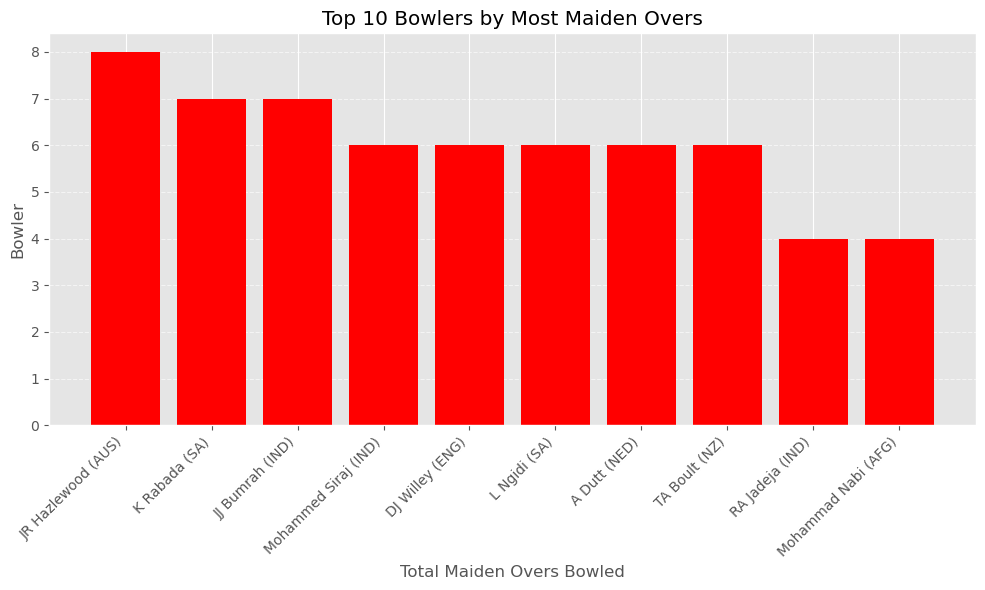

In [153]:
bowlers3 = top_maiden_takers.index.to_numpy()
total_maidens = top_maiden_takers.to_numpy()

plt.figure(figsize=(10, 6))
plt.bar(bowlers3, total_maidens, color='red')
plt.xlabel('Total Maiden Overs Bowled')
plt.ylabel('Bowler')
plt.title('Top 10 Bowlers by Most Maiden Overs')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [43]:
bowler_df['bowling_eco']=(bowler_df['econ'] * bowler_df['overs'])
bowler_df

,team,player,bb_bf,bat_or_bowl,wkts,overs,mdns,econ,bowling_eco
0,PAK,Shaheen Shah Afridi (PAK),60,bowl,3.0,10.0,0.0,4.50,45.00
1,ENG,DJ Willey (ENG),60,bowl,3.0,10.0,2.0,4.50,45.00
2,NZ,MJ Henry (NZ),60,bowl,3.0,10.0,1.0,4.80,48.00
3,NZ,LH Ferguson (NZ),60,bowl,3.0,10.0,0.0,4.90,49.00
4,AFG,Noor Ahmad (AFG),60,bowl,3.0,10.0,0.0,4.90,49.00
...,...,...,...,...,...,...,...,...,...
1403,NZ,MJ Santner (NZ),60,bowl,0.0,10.0,1.0,5.10,51.00
1404,AUS,A Zampa (AUS),42,bowl,0.0,7.0,0.0,7.85,54.95
1405,NZ,R Ravindra (NZ),42,bowl,0.0,7.0,0.0,8.57,59.99
1406,IND,RA Jadeja (IND),60,bowl,0.0,10.0,0.0,6.30,63.00


In [44]:
import numpy as np

bowler_df['bowling_eco_avg'] = bowler_df.groupby('player')['bowling_eco'].transform(np.mean)
bowler_df

,team,player,bb_bf,bat_or_bowl,wkts,overs,mdns,econ,bowling_eco,bowling_eco_avg
0,PAK,Shaheen Shah Afridi (PAK),60,bowl,3.0,10.0,0.0,4.50,45.00,53.431111
1,ENG,DJ Willey (ENG),60,bowl,3.0,10.0,2.0,4.50,45.00,43.150000
2,NZ,MJ Henry (NZ),60,bowl,3.0,10.0,1.0,4.80,48.00,44.481857
3,NZ,LH Ferguson (NZ),60,bowl,3.0,10.0,0.0,4.90,49.00,42.981429
4,AFG,Noor Ahmad (AFG),60,bowl,3.0,10.0,0.0,4.90,49.00,45.480000
...,...,...,...,...,...,...,...,...,...,...
1403,NZ,MJ Santner (NZ),60,bowl,0.0,10.0,1.0,5.10,51.00,44.759200
1404,AUS,A Zampa (AUS),42,bowl,0.0,7.0,0.0,7.85,54.95,47.085000
1405,NZ,R Ravindra (NZ),42,bowl,0.0,7.0,0.0,8.57,59.99,43.571333
1406,IND,RA Jadeja (IND),60,bowl,0.0,10.0,0.0,6.30,63.00,35.193000


In [45]:
bowler_df_sorted = bowler_df.sort_values(by='bowling_eco_avg', ascending=True)
top_economical_bowlers = bowler_df_sorted.head(7)
top_economical_bowlers

,team,player,bb_bf,bat_or_bowl,wkts,overs,mdns,econ,bowling_eco,bowling_eco_avg
1338,IND,RG Sharma (IND),5,bowl,1.0,0.5,0.0,8.40,4.20,4.200
328,BAN,Najmul Hossain Shanto (BAN),6,bowl,0.0,1.0,0.0,5.00,5.00,5.000
340,NZ,DJ Mitchell (NZ),6,bowl,0.0,1.0,0.0,11.00,11.00,5.800
323,NZ,DJ Mitchell (NZ),3,bowl,0.0,0.3,0.0,2.00,0.60,5.800
324,IND,V Kohli (IND),3,bowl,0.0,0.3,0.0,4.00,1.20,7.095
1339,NED,V Kohli (IND),18,bowl,1.0,3.0,0.0,4.33,12.99,7.095
335,SL,KIC Asalanka (SL),6,bowl,0.0,1.0,0.0,10.00,10.00,10.000


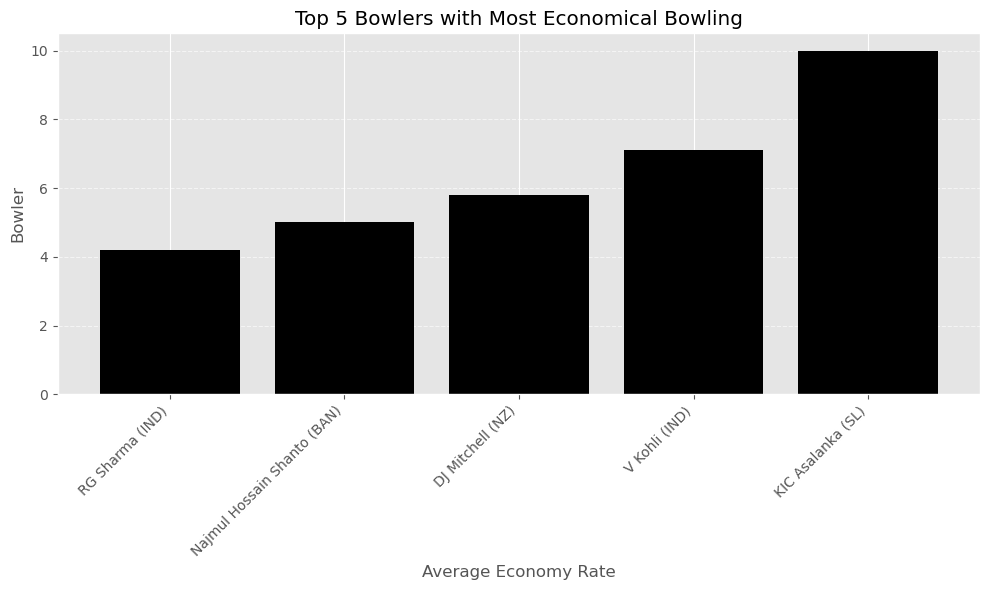

In [154]:
bowlers4 = top_economical_bowlers['player'].to_numpy()
economy_rates = top_economical_bowlers['bowling_eco_avg'].to_numpy()

plt.figure(figsize=(10, 6))
plt.bar(bowlers4, economy_rates, color='black')  
plt.xlabel('Average Economy Rate')  
plt.ylabel('Bowler')  
plt.title('Top 5 Bowlers with Most Economical Bowling')  
plt.xticks(rotation=45, ha='right') 
plt.grid(axis='y', linestyle='--', alpha=0.6) 
plt.tight_layout()
plt.show()

In [47]:
bowler_df['bowling_strike_rate'] = (bowler_df['overs'] * 6) / bowler_df['wkts']
print(bowler_df[['player', 'bowling_strike_rate']])

                         player  bowling_strike_rate
0     Shaheen Shah Afridi (PAK)                 20.0
1               DJ Willey (ENG)                 20.0
2                 MJ Henry (NZ)                 20.0
3              LH Ferguson (NZ)                 20.0
4              Noor Ahmad (AFG)                 20.0
...                         ...                  ...
1403            MJ Santner (NZ)                  inf
1404              A Zampa (AUS)                  inf
1405            R Ravindra (NZ)                  inf
1406            RA Jadeja (IND)                  inf
1407           LH Ferguson (NZ)                  inf

[562 rows x 2 columns]


In [48]:
print("Bowler Name | Strike Rate (Balls/Wicket) | Overs Bowled")
for index, row in bowler_df[bowler_df['overs'] > 0].iterrows():  
    print(f"{row['player']} | {row['bowling_strike_rate']:.2f} | {row['overs']}")

Bowler Name | Strike Rate (Balls/Wicket) | Overs Bowled
Shaheen Shah Afridi (PAK) | 20.00 | 10.0
DJ Willey (ENG) | 20.00 | 10.0
MJ Henry (NZ) | 20.00 | 10.0
LH Ferguson (NZ) | 20.00 | 10.0
Noor Ahmad (AFG) | 20.00 | 10.0
Mujeeb Ur Rahman (AFG) | 20.00 | 10.0
AU Rashid (ENG) | 16.00 | 8.0
LV van Beek (NED) | 17.00 | 8.5
Mehidy Hasan Miraz (BAN) | 18.00 | 9.0
Mohammad Wasim (1) (PAK) | 20.00 | 10.0
G Coetzee (SA) | 20.00 | 10.0
G Coetzee (SA) | 18.00 | 9.0
D Madushanka (SL) | 20.00 | 10.0
A Zampa (AUS) | 20.00 | 10.0
BFW de Leede (NED) | 20.00 | 10.0
Shoriful Islam (BAN) | 20.00 | 10.0
TA Boult (NZ) | 20.00 | 10.0
Tanzim Hasan Sakib (BAN) | 20.00 | 10.0
Haris Rauf (PAK) | 16.00 | 8.0
RJW Topley (ENG) | 17.00 | 8.5
Kuldeep Yadav (IND) | 15.30 | 5.1
AD Mathews (SL) | 15.00 | 5.0
Mohammad Nabi (AFG) | 18.00 | 6.0
GD Phillips (NZ) | 9.00 | 3.0
TA Boult (NZ) | 21.00 | 7.0
Mohammed Shami (IND) | 12.00 | 4.0
JJ Bumrah (IND) | 21.00 | 7.0
MR Marsh (AUS) | 12.00 | 4.0
DJ Willey (ENG) | 21.00 | 7.

In [49]:
bowlers_who_bowled = bowler_df[bowler_df['overs'] > 0]
bowler_df_sorted = bowlers_who_bowled.sort_values(by='bowling_strike_rate', ascending=True)
top_5_bowlers_with_sr=bowler_df_sorted .head(5)
top_5_bowlers_with_sr

,team,player,bb_bf,bat_or_bowl,wkts,overs,mdns,econ,bowling_eco,bowling_eco_avg,bowling_strike_rate
184,IND,RA Jadeja (IND),4,bowl,1.0,0.4,0.0,6.00,2.40,35.193000,2.4
1338,IND,RG Sharma (IND),5,bowl,1.0,0.5,0.0,8.40,4.20,4.200000,3.0
56,AUS,A Zampa (AUS),18,bowl,4.0,3.0,0.0,2.66,7.98,47.085000,4.5
50,IND,Mohammed Shami (IND),30,bowl,5.0,5.0,1.0,3.60,18.00,34.660833,6.0
86,SA,G Coetzee (SA),24,bowl,3.0,4.0,0.0,8.75,35.00,49.322500,8.0


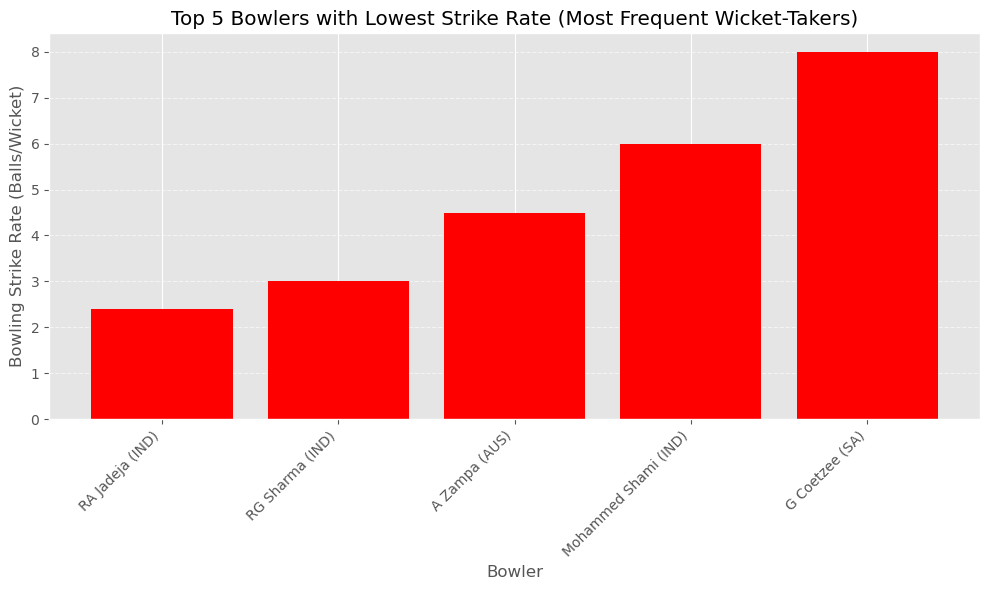

In [155]:
bowlers7 = top_5_bowlers_with_sr['player'].to_numpy()
strike_rates_bowl = top_5_bowlers_with_sr['bowling_strike_rate'].to_numpy()

plt.figure(figsize=(10, 6))
plt.bar(bowlers7, strike_rates_bowl, color='red')  
plt.xlabel('Bowler')  
plt.ylabel('Bowling Strike Rate (Balls/Wicket)')  
plt.title('Top 5 Bowlers with Lowest Strike Rate (Most Frequent Wicket-Takers)')  
plt.xticks(rotation=45, ha='right') 
plt.grid(axis='y', linestyle='--', alpha=0.6)  
plt.tight_layout()
plt.show()

## Teams Performance Evaluation

In [51]:
df.columns

Index(['team', 'player', 'bat_or_bowl', 'bb_bf', 'runs', 'wkts',
       'wicketball_prob', 'runs_per_ball', 'opposition', 'ground',
       'start_date', 'overs', 'mdns', 'econ', 'inns', '4s', '6s', 'sr',
       'not_out'],
      dtype='object')

In [52]:
batsmen_grouped = batsman_df.groupby('team')
bowlers_grouped = bowler_df.groupby('team')


total_runs_scored = batsmen_grouped['runs'].sum()
total_fours = batsmen_grouped['4s'].sum()
total_sixes = batsmen_grouped['6s'].sum()
highest_individual_score = batsmen_grouped['runs'].max()
average_batting_strike_rate = (batsmen_grouped['runs'].sum()/ 
                               batsmen_grouped['bb_bf'].sum())*100

total_wickets_taken = bowlers_grouped['wkts'].sum()
average_economy_rate = bowlers_grouped['econ'].mean()
total_overs= bowlers_grouped['overs'].sum()
total_balls_bowled = total_overs * 6 

team_df = pd.DataFrame({
     'Total Runs Scored': total_runs_scored,
    'Total Fours': total_fours,
    'Total Sixes': total_sixes,
    'Highest Individual Score': highest_individual_score,
    'Total Wickets Taken': total_wickets_taken,
    'Average Economy Rate': average_economy_rate,
     'Total Balls Bowled': total_balls_bowled,
    'Total overs played':total_overs,
    'Average Batting Strike Rate': average_batting_strike_rate,

})


In [53]:
team_df

,Total Runs Scored,Total Fours,Total Sixes,Highest Individual Score,Total Wickets Taken,Average Economy Rate,Total Balls Bowled,Total overs played,Average Batting Strike Rate
team,,,,,,,,,
AFG,1990,178.0,42.0,129,53.0,5.763818,2394.6,399.1,83.193980
AUS,2722,265.0,92.0,201,77.0,5.661129,2689.8,448.3,97.667743
BAN,1944,188.0,43.0,111,51.0,6.095769,2382.0,397.0,79.056527
ENG,2135,216.0,51.0,140,65.0,6.068302,2332.2,388.7,93.763724
IND,2810,265.0,89.0,131,94.0,4.963793,2492.4,415.4,104.655493
NED,1728,163.0,33.0,78,63.0,6.170339,2497.2,416.2,75.130435
NZ,2712,265.0,82.0,152,71.0,6.237143,2695.2,449.2,103.669725
PAK,2220,220.0,60.0,131,65.0,6.286923,2475.6,412.6,96.145518
SA,2773,243.0,99.0,174,88.0,5.682778,2547.0,424.5,99.497668


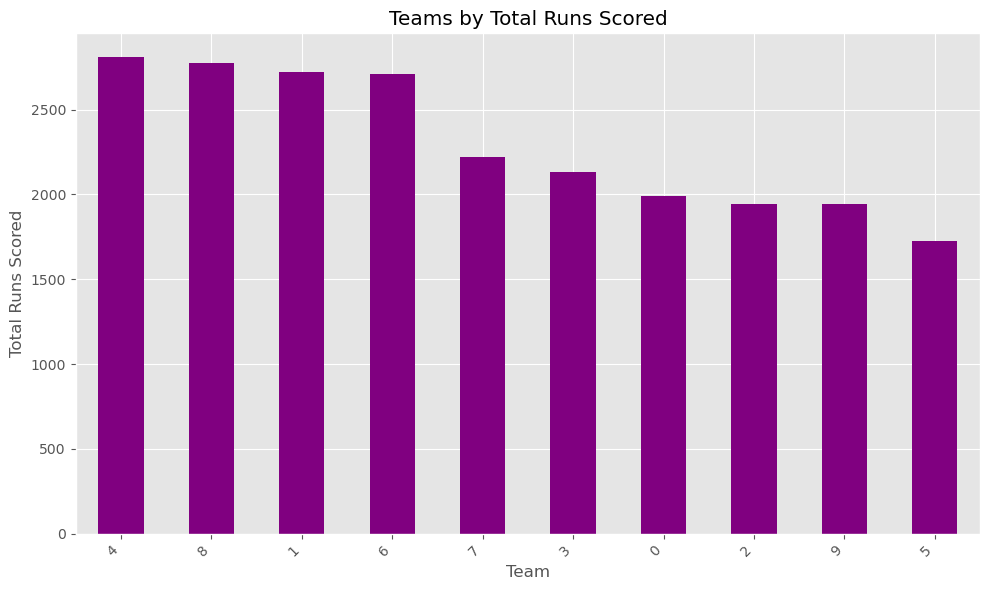

In [156]:
top_10_teams = team_df['Total Runs Scored'].sort_values(ascending=False)

plt.figure(figsize=(10, 6)) 
top_10_teams.plot(kind='bar', color='purple') 
plt.title('Teams by Total Runs Scored')
plt.xlabel('Team') 
plt.ylabel('Total Runs Scored') 
plt.xticks(rotation=45, ha='right')  
plt.tight_layout() 
plt.show()

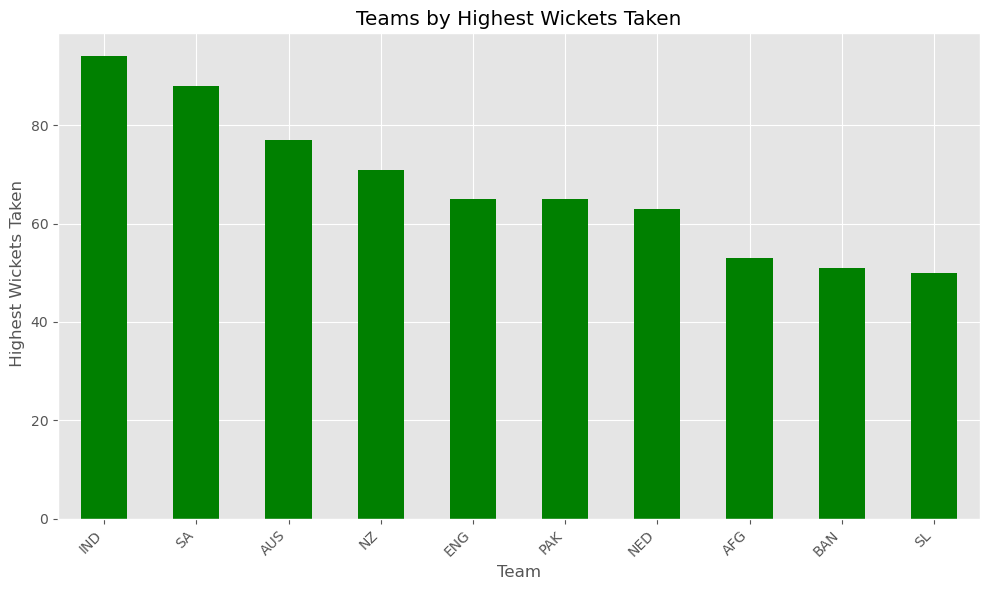

In [55]:
top_10_teams_highest_wckts = team_df['Total Wickets Taken'].sort_values(ascending=False)

plt.figure(figsize=(10, 6)) 
top_10_teams_highest_wckts.plot(kind='bar', color='green') 
plt.title('Teams by Highest Wickets Taken')
plt.xlabel('Team') 
plt.ylabel(' Highest Wickets Taken') 
plt.xticks(rotation=45, ha='right')  
plt.tight_layout() 
plt.show()

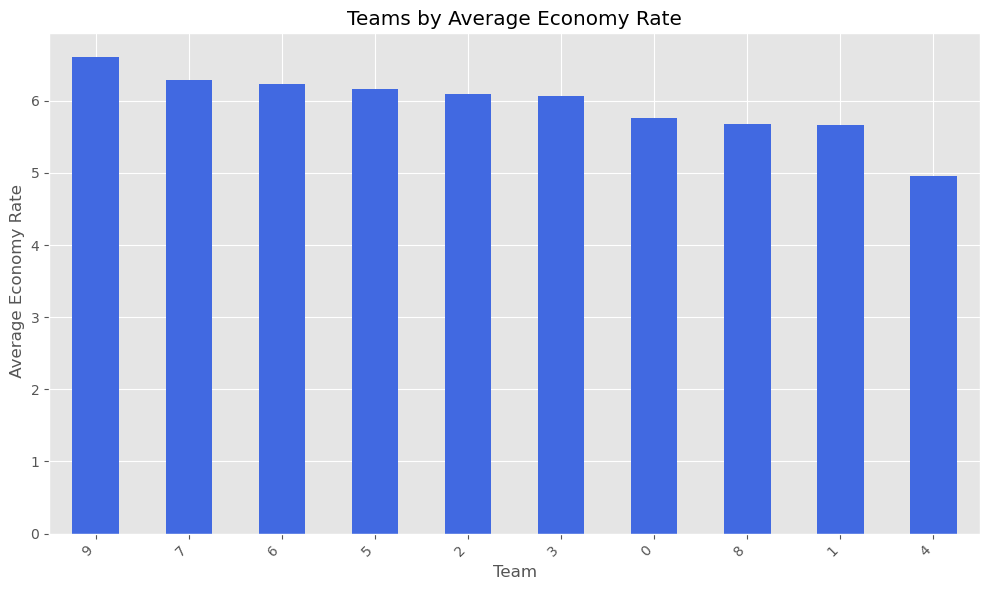

In [157]:
teams_by_average_economy_rate = team_df['Average Economy Rate'].sort_values(ascending=False)

plt.figure(figsize=(10, 6)) 
teams_by_average_economy_rate.plot(kind='bar', color='royalblue') 
plt.title('Teams by Average Economy Rate')
plt.xlabel('Team') 
plt.ylabel(' Average Economy Rate') 
plt.xticks(rotation=45, ha='right')  
plt.tight_layout() 
plt.show()

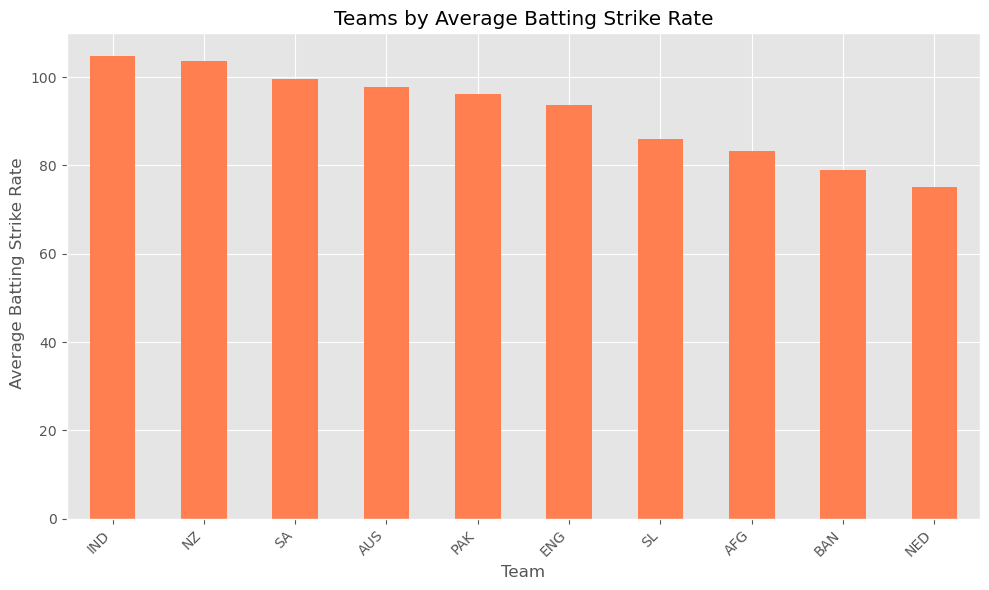

In [57]:
teams_by_average_strike_rate = team_df['Average Batting Strike Rate'].sort_values(ascending=False)

plt.figure(figsize=(10, 6)) 
teams_by_average_strike_rate.plot(kind='bar', color='coral') 
plt.title('Teams by Average Batting Strike Rate')
plt.xlabel('Team') 
plt.ylabel(' Average Batting Strike Rate') 
plt.xticks(rotation=45, ha='right')  
plt.tight_layout() 
plt.show()

<Figure size 1000x1000 with 0 Axes>

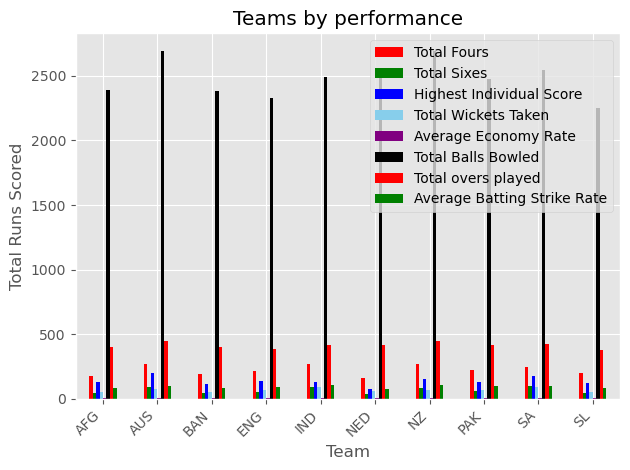

In [58]:
team_performance = team_df.drop(columns='Total Runs Scored')
colors=['red','green','blue','skyblue','purple','black']
plt.figure(figsize=(10, 10))  
team_performance.plot(kind='bar', color=colors) 
plt.title('Teams by performance')  
plt.xlabel('Team')
plt.ylabel('Total Runs Scored')  
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()  
plt.legend(loc='upper right')
plt.show()

In [59]:
team_df_with_team_column = team_df.reset_index()  
print(team_df_with_team_column)

print(f"Team names: {team_df_with_team_column['team'].tolist()}")

  team  Total Runs Scored  Total Fours  Total Sixes  Highest Individual Score  \
0  AFG               1990        178.0         42.0                       129   
1  AUS               2722        265.0         92.0                       201   
2  BAN               1944        188.0         43.0                       111   
3  ENG               2135        216.0         51.0                       140   
4  IND               2810        265.0         89.0                       131   
5  NED               1728        163.0         33.0                        78   
6   NZ               2712        265.0         82.0                       152   
7  PAK               2220        220.0         60.0                       131   
8   SA               2773        243.0         99.0                       174   
9   SL               1942        201.0         45.0                       122   

   Total Wickets Taken  Average Economy Rate  Total Balls Bowled  \
0                 53.0              5.76

In [60]:
team_df=team_df_with_team_column

In [61]:
team_df

,team,Total Runs Scored,Total Fours,Total Sixes,Highest Individual Score,Total Wickets Taken,Average Economy Rate,Total Balls Bowled,Total overs played,Average Batting Strike Rate
0,AFG,1990,178.0,42.0,129,53.0,5.763818,2394.6,399.1,83.193980
1,AUS,2722,265.0,92.0,201,77.0,5.661129,2689.8,448.3,97.667743
2,BAN,1944,188.0,43.0,111,51.0,6.095769,2382.0,397.0,79.056527
3,ENG,2135,216.0,51.0,140,65.0,6.068302,2332.2,388.7,93.763724
4,IND,2810,265.0,89.0,131,94.0,4.963793,2492.4,415.4,104.655493
5,NED,1728,163.0,33.0,78,63.0,6.170339,2497.2,416.2,75.130435
6,NZ,2712,265.0,82.0,152,71.0,6.237143,2695.2,449.2,103.669725
7,PAK,2220,220.0,60.0,131,65.0,6.286923,2475.6,412.6,96.145518
8,SA,2773,243.0,99.0,174,88.0,5.682778,2547.0,424.5,99.497668
9,SL,1942,201.0,45.0,122,50.0,6.606111,2253.0,375.5,86.043420


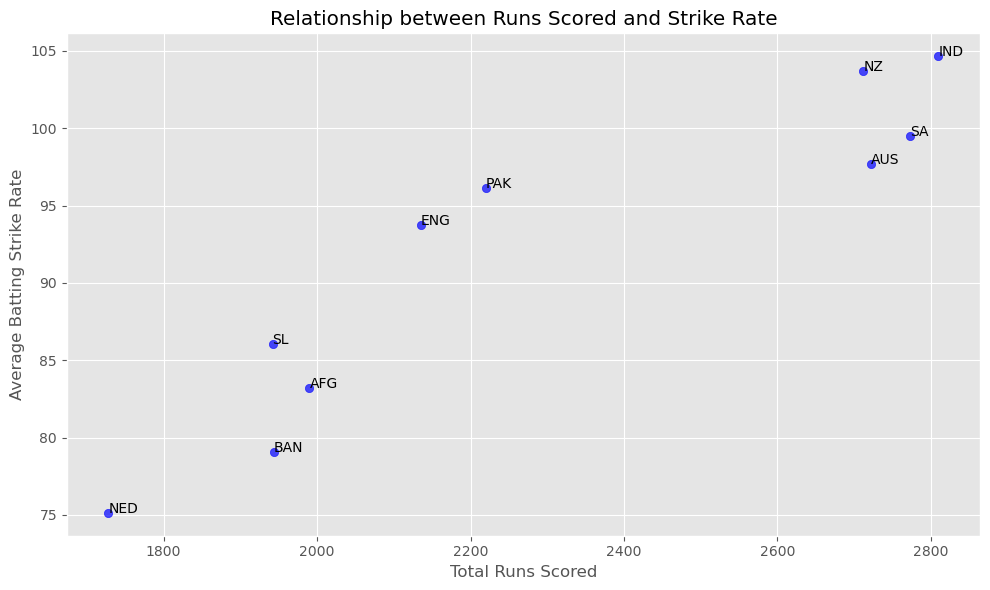

In [62]:

plt.figure(figsize=(10, 6))
plt.scatter(team_df['Total Runs Scored'], team_df['Average Batting Strike Rate'], color='blue', alpha=0.7) 

plt.xlabel('Total Runs Scored')
plt.ylabel('Average Batting Strike Rate')
plt.title('Relationship between Runs Scored and Strike Rate')

for i, row in team_df.iterrows():
    plt.annotate(row['team'], (row['Total Runs Scored'], row['Average Batting Strike Rate']))
plt.grid(True)  
plt.tight_layout()
plt.show()

#### There appears to be a positive correlation between Runs Scored and Strike Rate. This means that teams with a higher Strike Rate (more aggressive batting) tend to also score more runs.

High Run Scorers & High Strike Rate: Teams positioned in the upper right corner (e.g., NZ, IND) likely exhibit an aggressive batting style, scoring a high number of runs with a high Strike Rate.

High Run Scorers (Moderate Strike Rate): Teams in the upper middle (e.g., ENG) might achieve high scores through a combination of aggressive and composed batting approaches.

Lower Run Scorers (Varied Strike Rates): Teams scattered throughout the lower areas (e.g., BAN, AFG) might have various batting styles, with some scoring moderately with a cautious approach (low Strike Rate) and others scoring fewer runs despite a more aggressive style (high Strike Rate).

In [63]:
aggressive_batting_teams = team_df[(team_df['Average Batting Strike Rate'] > team_df['Average Batting Strike Rate'].mean()) 
                                 & (team_df['Total Sixes'] > team_df['Total Sixes'].mean())]

print(f"Teams with potentially aggressive batting style:")
aggressive_batting_teams

Teams with potentially aggressive batting style:


,team,Total Runs Scored,Total Fours,Total Sixes,Highest Individual Score,Total Wickets Taken,Average Economy Rate,Total Balls Bowled,Total overs played,Average Batting Strike Rate
1,AUS,2722,265.0,92.0,201,77.0,5.661129,2689.8,448.3,97.667743
4,IND,2810,265.0,89.0,131,94.0,4.963793,2492.4,415.4,104.655493
6,NZ,2712,265.0,82.0,152,71.0,6.237143,2695.2,449.2,103.669725
8,SA,2773,243.0,99.0,174,88.0,5.682778,2547.0,424.5,99.497668


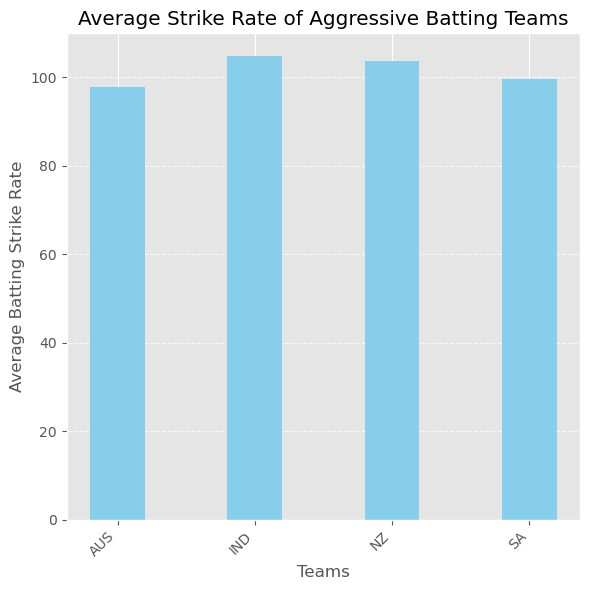

In [64]:
aggressive_teams = ['AUS','IND','NZ','SA']

plt.figure(figsize=(6,6))
bar_width = 0.4  
plt.bar(aggressive_teams, aggressive_batting_teams['Average Batting Strike Rate'], color='skyblue', width=bar_width, align='center')
plt.xlabel('Teams')
plt.ylabel('Average Batting Strike Rate')
plt.title('Average Strike Rate of Aggressive Batting Teams')
plt.xticks(rotation=45, ha='right') 
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.tight_layout()
plt.show()

In [65]:
team_df['Total Boundaries'] = team_df['Total Fours'] + team_df['Total Sixes']

In [66]:
team_df

,team,Total Runs Scored,Total Fours,Total Sixes,Highest Individual Score,Total Wickets Taken,Average Economy Rate,Total Balls Bowled,Total overs played,Average Batting Strike Rate,Total Boundaries
0,AFG,1990,178.0,42.0,129,53.0,5.763818,2394.6,399.1,83.193980,220.0
1,AUS,2722,265.0,92.0,201,77.0,5.661129,2689.8,448.3,97.667743,357.0
2,BAN,1944,188.0,43.0,111,51.0,6.095769,2382.0,397.0,79.056527,231.0
3,ENG,2135,216.0,51.0,140,65.0,6.068302,2332.2,388.7,93.763724,267.0
4,IND,2810,265.0,89.0,131,94.0,4.963793,2492.4,415.4,104.655493,354.0
5,NED,1728,163.0,33.0,78,63.0,6.170339,2497.2,416.2,75.130435,196.0
6,NZ,2712,265.0,82.0,152,71.0,6.237143,2695.2,449.2,103.669725,347.0
7,PAK,2220,220.0,60.0,131,65.0,6.286923,2475.6,412.6,96.145518,280.0
8,SA,2773,243.0,99.0,174,88.0,5.682778,2547.0,424.5,99.497668,342.0
9,SL,1942,201.0,45.0,122,50.0,6.606111,2253.0,375.5,86.043420,246.0


In [67]:
boundary_percentage = (team_df['Total Boundaries'] / team_df['Total Balls Bowled'].sum()) * 100
team_df['Boundary Perctange']= boundary_percentage
team_df

,team,Total Runs Scored,Total Fours,Total Sixes,Highest Individual Score,Total Wickets Taken,Average Economy Rate,Total Balls Bowled,Total overs played,Average Batting Strike Rate,Total Boundaries,Boundary Perctange
0,AFG,1990,178.0,42.0,129,53.0,5.763818,2394.6,399.1,83.193980,220.0,0.888566
1,AUS,2722,265.0,92.0,201,77.0,5.661129,2689.8,448.3,97.667743,357.0,1.441900
2,BAN,1944,188.0,43.0,111,51.0,6.095769,2382.0,397.0,79.056527,231.0,0.932994
3,ENG,2135,216.0,51.0,140,65.0,6.068302,2332.2,388.7,93.763724,267.0,1.078396
4,IND,2810,265.0,89.0,131,94.0,4.963793,2492.4,415.4,104.655493,354.0,1.429783
5,NED,1728,163.0,33.0,78,63.0,6.170339,2497.2,416.2,75.130435,196.0,0.791631
6,NZ,2712,265.0,82.0,152,71.0,6.237143,2695.2,449.2,103.669725,347.0,1.401511
7,PAK,2220,220.0,60.0,131,65.0,6.286923,2475.6,412.6,96.145518,280.0,1.130902
8,SA,2773,243.0,99.0,174,88.0,5.682778,2547.0,424.5,99.497668,342.0,1.381316
9,SL,1942,201.0,45.0,122,50.0,6.606111,2253.0,375.5,86.043420,246.0,0.993578


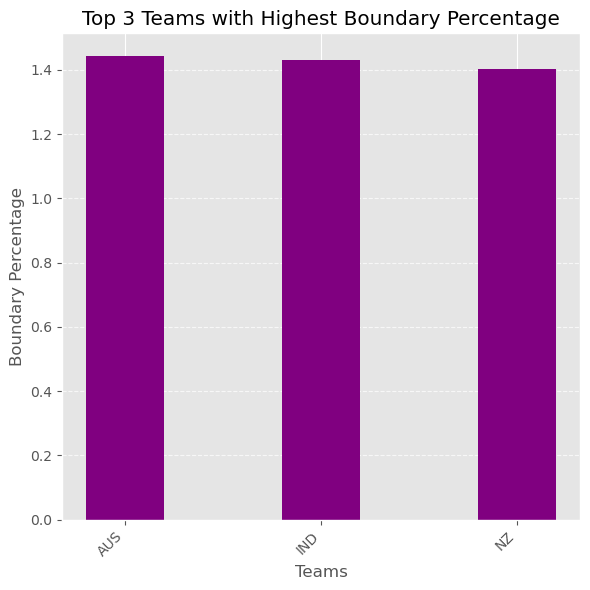

In [158]:
sorted_by_boundary_pct = team_df.sort_values(by='Boundary Perctange', ascending=False)
top_3_teams = sorted_by_boundary_pct.head(3)['team'].tolist()  

plt.figure(figsize=(6, 6))
plt.bar(top_3_teams, sorted_by_boundary_pct.head(3)['Boundary Perctange'], color='purple',width=0.4) 
plt.xlabel('Teams')
plt.ylabel('Boundary Percentage')
plt.title('Top 3 Teams with Highest Boundary Percentage')
plt.xticks(rotation=45, ha='right')  
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

In [69]:
import pandas as pd

team_opposition_grouped = df.groupby(['team', 'opposition'])

batting_stats = {}
bowling_stats = {}

batting_data = df[df['bat_or_bowl'] == 'bat']
batting_stats['avg_runs'] = batting_data.groupby(['team', 'opposition'])['runs'].mean().unstack()
batting_stats['avg_strike_rate'] = batting_data.groupby(['team', 'opposition'])['sr'].mean().unstack()
batting_stats['avg_fours'] = batting_data.groupby(['team', 'opposition'])['4s'].mean().unstack()
batting_stats['avg_sixes'] = batting_data.groupby(['team', 'opposition'])['6s'].mean().unstack()

bowling_data = df[df['bat_or_bowl'] == 'bowl']
bowling_stats['avg_wickets'] = bowling_data.groupby(['team', 'opposition'])['wkts'].mean().unstack()
bowling_stats['avg_economy'] = bowling_data.groupby(['team', 'opposition'])['econ'].mean().unstack()
bowling_stats['bowling_strike_rate'] = bowling_data.groupby(['team', 'opposition'])['wicketball_prob'].mean().unstack()



In [70]:
batting_data = df[df['bat_or_bowl'] == 'bat']
avg_runs = batting_data.groupby(['team', 'opposition'])['runs'].mean()
avg_strike_rate= batting_data.groupby(['team', 'opposition'])['sr'].mean()
avg_fours= batting_data.groupby(['team', 'opposition'])['4s'].mean()
avg_sixes = batting_data.groupby(['team', 'opposition'])['6s'].mean()

bowling_data = df[df['bat_or_bowl'] == 'bowl']
avg_wickets = bowling_data.groupby(['team', 'opposition'])['wkts'].mean()
avg_economy = bowling_data.groupby(['team', 'opposition'])['econ'].mean()
bowling_strike_rate = bowling_data.groupby(['team', 'opposition'])['wicketball_prob'].mean()

opposition_df = pd.DataFrame({
   'avg_runs':avg_runs,
  'avg_strike_rate': avg_strike_rate,
  'avg_fours': avg_fours,
  'avg_sixes': avg_sixes ,
  'avg_wickets': avg_wickets,
  'avg_economy': avg_economy,
   'bowling_strike_rate': bowling_strike_rate
})

In [71]:
opposition_df

avg_runs  avg_strike_rate  avg_fours  avg_sixes  \
team opposition                                                         
AFG  v Australia     39.285714       105.642857   2.285714   1.285714   
     v Bangladesh    14.800000        56.287000   1.500000   0.200000   
     v England       24.454545        83.178182   2.090909   0.727273   
     v India         25.700000        83.157000   2.500000   0.700000   
     v Netherlands   33.800000        88.844000   4.200000   0.000000   
...                        ...              ...        ...        ...   
SL   v India          4.090909        25.455455   0.545455   0.000000   
     v Netherlands   34.142857        85.307143   3.285714   0.428571   
     v New Zealand   15.181818        63.898182   1.909091   0.272727   
     v Pakistan      33.000000        69.522000   3.600000   0.900000   
     v South Africa  27.818182        90.557273   2.636364   1.545455   

                     avg_wickets  avg_economy  bowling_strike_rate  
team opposition                                                     
AFG  v Australia        1.000000     6.748333             0.019665  
     v Bangladesh       0.500000     4.396667             0.024346  
     v England          1.666667     5.436667             0.034962  
     v India            0.333333     7.691667             0.006944  
     v Netherlands      1.000000     4.056667             0.017723  
...                          ...          ...                  ...  
SL   v India            1.000000     6.530000             0.016667  
     v Netherlands      1.500000     4.991667             0.026618  
     v New Zealand      0.800000     7.708000             0.029762  
     v Pakistan         0.571429     7.588571             0.010128  
     v South Africa     0.833333     8.491667             0.013889  

[91 rows x 7 columns]

In [72]:
opposition_df_with_team_column = opposition_df.reset_index()  
print(opposition_df_with_team_column)

print(f"Team names: {opposition_df_with_team_column['team'].tolist()}")

   team      opposition   avg_runs  avg_strike_rate  avg_fours  avg_sixes  \
0   AFG     v Australia  39.285714       105.642857   2.285714   1.285714   
1   AFG    v Bangladesh  14.800000        56.287000   1.500000   0.200000   
2   AFG       v England  24.454545        83.178182   2.090909   0.727273   
3   AFG         v India  25.700000        83.157000   2.500000   0.700000   
4   AFG   v Netherlands  33.800000        88.844000   4.200000   0.000000   
..  ...             ...        ...              ...        ...        ...   
86   SL         v India   4.090909        25.455455   0.545455   0.000000   
87   SL   v Netherlands  34.142857        85.307143   3.285714   0.428571   
88   SL   v New Zealand  15.181818        63.898182   1.909091   0.272727   
89   SL      v Pakistan  33.000000        69.522000   3.600000   0.900000   
90   SL  v South Africa  27.818182        90.557273   2.636364   1.545455   

    avg_wickets  avg_economy  bowling_strike_rate  
0      1.000000     6.7

In [73]:
opposition_df=opposition_df_with_team_column
opposition_df

,team,opposition,avg_runs,avg_strike_rate,avg_fours,avg_sixes,avg_wickets,avg_economy,bowling_strike_rate
0,AFG,v Australia,39.285714,105.642857,2.285714,1.285714,1.000000,6.748333,0.019665
1,AFG,v Bangladesh,14.800000,56.287000,1.500000,0.200000,0.500000,4.396667,0.024346
2,AFG,v England,24.454545,83.178182,2.090909,0.727273,1.666667,5.436667,0.034962
3,AFG,v India,25.700000,83.157000,2.500000,0.700000,0.333333,7.691667,0.006944
4,AFG,v Netherlands,33.800000,88.844000,4.200000,0.000000,1.000000,4.056667,0.017723
...,...,...,...,...,...,...,...,...,...
86,SL,v India,4.090909,25.455455,0.545455,0.000000,1.000000,6.530000,0.016667
87,SL,v Netherlands,34.142857,85.307143,3.285714,0.428571,1.500000,4.991667,0.026618
88,SL,v New Zealand,15.181818,63.898182,1.909091,0.272727,0.800000,7.708000,0.029762
89,SL,v Pakistan,33.000000,69.522000,3.600000,0.900000,0.571429,7.588571,0.010128


In [74]:
opp_afg = opposition_df[opposition_df['team']=='AFG']

In [75]:
opp_afg.sort_values(by='avg_strike_rate',ascending=False)

,team,opposition,avg_runs,avg_strike_rate,avg_fours,avg_sixes,avg_wickets,avg_economy,bowling_strike_rate
0,AFG,v Australia,39.285714,105.642857,2.285714,1.285714,1.000000,6.748333,0.019665
6,AFG,v Pakistan,69.250000,99.487500,7.000000,0.750000,1.166667,6.065000,0.024603
4,AFG,v Netherlands,33.800000,88.844000,4.200000,0.000000,1.000000,4.056667,0.017723
2,AFG,v England,24.454545,83.178182,2.090909,0.727273,1.666667,5.436667,0.034962
3,AFG,v India,25.700000,83.157000,2.500000,0.700000,0.333333,7.691667,0.006944
7,AFG,v South Africa,20.818182,75.422727,1.818182,0.545455,0.714286,6.534286,0.011905
8,AFG,v Sri Lanka,46.400000,69.288000,3.800000,1.000000,1.333333,5.035000,0.023413
5,AFG,v New Zealand,12.181818,61.710909,1.000000,0.181818,1.000000,5.781667,0.020437
1,AFG,v Bangladesh,14.800000,56.287000,1.500000,0.200000,0.500000,4.396667,0.024346


In [76]:
opposition_df['team'].unique()

array(['AFG', 'AUS', 'BAN', 'ENG', 'IND', 'NED', 'NZ', 'PAK', 'SA', 'SL'],
      dtype=object)

In [77]:
opp_aus= opposition_df[opposition_df['team']=='AUS']
opp_aus.sort_values(by='avg_strike_rate',ascending=False)

,team,opposition,avg_runs,avg_strike_rate,avg_fours,avg_sixes,avg_wickets,avg_economy,bowling_strike_rate
17,AUS,v Sri Lanka,30.285714,113.980000,3.142857,0.714286,1.500000,4.860000,0.030305
14,AUS,v New Zealand,37.900000,113.713000,3.200000,2.000000,1.333333,7.808333,0.022840
13,AUS,v Netherlands,38.700000,107.175000,4.200000,1.500000,1.800000,4.182000,0.083333
10,AUS,v Bangladesh,75.750000,102.575000,7.250000,2.500000,0.714286,6.542857,0.014286
11,AUS,v England,25.090909,93.647273,2.272727,0.272727,1.666667,5.506667,0.032449
15,AUS,v Pakistan,31.090909,78.319091,2.636364,1.727273,1.666667,6.896667,0.035880
16,AUS,v South Africa,17.900000,71.701000,2.000000,0.300000,1.307692,5.233846,0.025702
9,AUS,v Afghanistan,30.888889,70.385556,3.333333,1.333333,0.714286,5.181429,0.012698
12,AUS,v India,17.000000,52.906364,1.454545,0.181818,0.666667,4.923333,0.012731


In [78]:
opp_BAN= opposition_df[opposition_df['team']=='BAN']
opp_BAN.sort_values(by='avg_strike_rate',ascending=False)

,team,opposition,avg_runs,avg_strike_rate,avg_fours,avg_sixes,avg_wickets,avg_economy,bowling_strike_rate
26,BAN,v Sri Lanka,28.777778,114.441111,3.666667,0.777778,1.600000,5.572000,0.027018
21,BAN,v India,25.000000,85.066000,1.800000,0.800000,0.500000,6.280000,0.009028
19,BAN,v Australia,28.200000,83.556000,2.700000,0.600000,0.400000,6.902000,0.006782
24,BAN,v Pakistan,17.727273,76.725455,1.727273,0.272727,0.500000,6.011667,0.009259
23,BAN,v New Zealand,21.454545,67.731818,1.818182,0.727273,0.400000,5.764000,0.007500
18,BAN,v Afghanistan,25.000000,66.696667,2.166667,0.166667,1.666667,4.701667,0.037046
25,BAN,v South Africa,19.636364,64.809091,2.272727,0.454545,0.714286,7.520000,0.015873
20,BAN,v England,20.000000,59.721818,1.545455,0.272727,1.500000,7.343333,0.029630
22,BAN,v Netherlands,13.600000,49.403000,1.600000,0.200000,1.500000,4.521667,0.027998


In [79]:
opp_ENG= opposition_df[opposition_df['team']=='ENG']
opp_ENG.sort_values(by='avg_strike_rate',ascending=False)

,team,opposition,avg_runs,avg_strike_rate,avg_fours,avg_sixes,avg_wickets,avg_economy,bowling_strike_rate
31,ENG,v Netherlands,28.909091,115.322727,2.363636,0.909091,1.800000,4.612000,0.038786
34,ENG,v South Africa,15.500000,110.700000,1.800000,0.900000,1.166667,8.020000,0.021162
29,ENG,v Bangladesh,32.454545,109.147273,3.727273,0.636364,1.666667,4.708333,0.036658
33,ENG,v Pakistan,26.500000,102.487500,2.916667,0.666667,2.000000,5.524000,0.037727
32,ENG,v New Zealand,25.090909,93.630909,1.909091,0.545455,0.166667,7.910000,0.004630
27,ENG,v Afghanistan,18.363636,86.760909,2.181818,0.090909,1.142857,6.490000,0.023463
28,ENG,v Australia,23.900000,71.508000,2.200000,0.600000,1.666667,5.880000,0.030214
35,ENG,v Sri Lanka,13.545455,67.446364,1.727273,0.090909,0.333333,6.293333,0.011111
30,ENG,v India,11.000000,46.783636,0.909091,0.272727,1.333333,4.773333,0.023148


In [80]:
opp_IND= opposition_df[opposition_df['team']=='IND']
opp_IND.sort_values(by='avg_strike_rate',ascending=False)

,team,opposition,avg_runs,avg_strike_rate,avg_fours,avg_sixes,avg_wickets,avg_economy,bowling_strike_rate
40,IND,v Netherlands,65.833333,143.156667,6.166667,2.666667,1.125000,5.907500,0.045370
44,IND,v Sri Lanka,37.444444,119.967778,3.444444,1.000000,2.000000,2.996000,0.104286
43,IND,v South Africa,42.857143,118.854286,5.000000,0.857143,2.000000,3.012000,0.056422
36,IND,v Afghanistan,64.500000,115.712500,7.000000,2.000000,1.333333,5.398333,0.026455
41,IND,v New Zealand,47.000000,107.255000,4.214286,1.857143,1.900000,5.925000,0.032050
42,IND,v Pakistan,38.000000,104.364000,3.600000,1.600000,1.666667,4.663333,0.035345
38,IND,v Bangladesh,51.400000,99.708000,4.600000,1.800000,1.142857,6.450000,0.019312
39,IND,v England,22.200000,56.661000,2.000000,0.400000,2.000000,3.720000,0.046777
37,IND,v Australia,32.166667,49.185000,2.333333,0.500000,1.666667,4.538333,0.035755


In [81]:
opp_NED= opposition_df[opposition_df['team']=='NED']
opp_NED.sort_values(by='avg_strike_rate',ascending=False)

,team,opposition,avg_runs,avg_strike_rate,avg_fours,avg_sixes,avg_wickets,avg_economy,bowling_strike_rate
49,NED,v India,21.545455,90.582727,1.727273,0.818182,0.666667,8.158333,0.011111
53,NED,v South Africa,21.300000,85.067000,2.300000,0.600000,1.666667,4.771667,0.037983
54,NED,v Sri Lanka,20.818182,78.399091,1.181818,0.272727,0.833333,5.661667,0.015139
51,NED,v New Zealand,19.909091,73.964545,1.727273,0.272727,1.000000,6.745714,0.017725
47,NED,v Bangladesh,19.727273,66.765455,2.000000,0.181818,1.500000,3.783333,0.032920
48,NED,v England,15.545455,66.681818,1.363636,0.545455,1.333333,6.725000,0.022222
52,NED,v Pakistan,17.818182,61.391818,1.818182,0.363636,1.125000,6.213750,0.023495
46,NED,v Australia,7.545455,46.535455,1.181818,0.000000,1.000000,7.631429,0.017687
45,NED,v Afghanistan,14.818182,41.919091,1.727273,0.000000,0.500000,5.795000,0.018783
50,NED,v Netherlands,NaN,NaN,NaN,NaN,1.000000,4.330000,0.055556


In [82]:
opp_NZ= opposition_df[opposition_df['team']=='NZ']
opp_NZ.sort_values(by='avg_strike_rate',ascending=False)

,team,opposition,avg_runs,avg_strike_rate,avg_fours,avg_sixes,avg_wickets,avg_economy,bowling_strike_rate
61,NZ,v Pakistan,46.875000,130.921250,5.750000,1.000000,0.166667,7.021667,0.005556
63,NZ,v Sri Lanka,24.285714,121.335714,3.285714,0.714286,1.666667,3.605000,0.030163
60,NZ,v Netherlands,34.333333,120.561111,3.333333,1.111111,1.500000,4.825000,0.026471
56,NZ,v Australia,35.700000,118.571000,3.300000,1.200000,1.428571,9.375714,0.034712
55,NZ,v Afghanistan,34.750000,102.096250,2.375000,1.375000,1.666667,4.115000,0.041822
57,NZ,v Bangladesh,47.400000,99.334000,4.000000,1.200000,1.285714,5.868571,0.030952
58,NZ,v England,91.666667,84.576667,10.000000,2.666667,1.500000,5.760000,0.037963
59,NZ,v India,26.476190,73.976667,2.238095,0.857143,0.750000,6.815000,0.013349
62,NZ,v South Africa,15.500000,57.221000,1.700000,0.400000,0.571429,7.498571,0.011472


In [83]:
opp_PAK= opposition_df[opposition_df['team']=='PAK']
opp_PAK.sort_values(by='avg_strike_rate',ascending=False)

,team,opposition,avg_runs,avg_strike_rate,avg_fours,avg_sixes,avg_wickets,avg_economy,bowling_strike_rate
72,PAK,v Sri Lanka,53.166667,117.991667,4.333333,1.000000,1.500000,6.680000,0.026312
70,PAK,v New Zealand,65.333333,101.583333,5.000000,4.333333,1.000000,8.178333,0.017361
66,PAK,v Bangladesh,40.200000,100.276000,3.800000,1.800000,2.000000,4.368000,0.038356
65,PAK,v Australia,28.600000,98.634000,3.400000,0.600000,1.500000,7.126667,0.027392
64,PAK,v Afghanistan,33.125000,92.743750,2.125000,1.125000,0.333333,5.868333,0.005556
71,PAK,v South Africa,25.100000,82.628000,2.300000,0.800000,1.500000,5.881667,0.026389
69,PAK,v Netherlands,25.181818,81.577273,3.000000,0.272727,1.500000,5.021667,0.037864
67,PAK,v England,19.833333,70.842500,2.250000,0.500000,1.333333,6.741667,0.023413
68,PAK,v India,17.000000,61.847273,2.363636,0.000000,0.600000,6.418000,0.016667


In [84]:
opp_SA= opposition_df[opposition_df['team']=='SA']
opp_SA.sort_values(by='avg_strike_rate',ascending=False)

,team,opposition,avg_runs,avg_strike_rate,avg_fours,avg_sixes,avg_wickets,avg_economy,bowling_strike_rate
79,SA,v New Zealand,57.500000,214.605000,4.333333,2.500000,2.000000,4.520000,0.043127
81,SA,v Sri Lanka,57.857143,155.805714,6.428571,2.000000,2.000000,7.090000,0.037122
76,SA,v England,42.666667,125.746667,4.222222,1.444444,1.800000,8.156000,0.073889
75,SA,v Bangladesh,53.142857,114.141429,3.714286,2.714286,2.000000,4.986000,0.036026
80,SA,v Pakistan,22.727273,89.363636,1.909091,0.727273,1.666667,5.641667,0.031930
73,SA,v Afghanistan,34.000000,83.218571,2.142857,1.285714,1.500000,4.950000,0.027171
78,SA,v Netherlands,18.090909,75.870909,1.818182,0.454545,1.600000,5.452000,0.031019
74,SA,v Australia,27.722222,67.472778,2.333333,0.888889,1.545455,4.683636,0.031135
77,SA,v India,7.363636,58.269091,0.909091,0.000000,0.833333,6.796667,0.014540


In [85]:
opp_SL= opposition_df[opposition_df['team']=='SL']
opp_SL.sort_values(by='avg_strike_rate',ascending=False)

,team,opposition,avg_runs,avg_strike_rate,avg_fours,avg_sixes,avg_wickets,avg_economy,bowling_strike_rate
85,SL,v England,39.250000,96.200000,4.250000,0.750000,1.333333,5.476667,0.034286
90,SL,v South Africa,27.818182,90.557273,2.636364,1.545455,0.833333,8.491667,0.013889
87,SL,v Netherlands,34.142857,85.307143,3.285714,0.428571,1.500000,4.991667,0.026618
82,SL,v Afghanistan,23.000000,72.691000,1.900000,0.200000,0.500000,5.390000,0.008951
89,SL,v Pakistan,33.000000,69.522000,3.600000,0.900000,0.571429,7.588571,0.010128
84,SL,v Bangladesh,27.200000,66.429000,2.700000,0.700000,1.166667,6.970000,0.022258
88,SL,v New Zealand,15.181818,63.898182,1.909091,0.272727,0.800000,7.708000,0.029762
83,SL,v Australia,19.600000,56.373000,2.300000,0.100000,0.666667,6.328333,0.012235
86,SL,v India,4.090909,25.455455,0.545455,0.000000,1.000000,6.530000,0.016667


In [86]:
batsman_df['ground']=df[df['bat_or_bowl']=='bat']['ground']

In [87]:
batsman_df

,team,player,bat_or_bowl,bb_bf,runs,runs_per_ball,inns,4s,6s,sr,not_out,strike_rate,batting_average,impact_score,ground
501,AUS,GJ Maxwell (AUS),bat,128,201,1.5703,2,21.0,10.0,157.03,1.0,1.570312,100.5,111.021094,Wankhede
502,SA,Q de Kock (SA),bat,140,174,1.2428,1,15.0,7.0,124.28,0.0,1.242857,174.0,122.172857,Wankhede
503,AUS,DA Warner (AUS),bat,124,163,1.3145,1,14.0,9.0,131.45,0.0,1.314516,163.0,114.494355,Bengaluru
504,NZ,DP Conway (NZ),bat,121,152,1.2561,2,19.0,3.0,125.61,1.0,1.256198,76.0,83.976860,Ahmedabad
505,ENG,DJ Malan (ENG),bat,107,140,1.3084,1,16.0,5.0,130.84,0.0,1.308411,140.0,98.392523,Dharamsala
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1380,AUS,GJ Maxwell (AUS),bat,5,1,0.2000,2,0.0,0.0,20.00,0.0,0.200000,0.5,0.610000,Eden Gardens
1381,NZ,TWM Latham (NZ),bat,2,0,0.0000,2,0.0,0.0,0.00,0.0,0.000000,0.0,0.000000,Wankhede
1382,SA,T Bavuma (SA),bat,4,0,0.0000,1,0.0,0.0,0.00,0.0,0.000000,0.0,0.000000,Eden Gardens
1383,SA,M Jansen (SA),bat,1,0,0.0000,1,0.0,0.0,0.00,0.0,0.000000,0.0,0.000000,Eden Gardens


In [88]:
bowler_df['ground']=df[df['bat_or_bowl']=='bowl']['ground']
bowler_df

,team,player,bb_bf,bat_or_bowl,wkts,overs,mdns,econ,bowling_eco,bowling_eco_avg,bowling_strike_rate,ground
0,PAK,Shaheen Shah Afridi (PAK),60,bowl,3.0,10.0,0.0,4.50,45.00,53.431111,20.0,Chennai
1,ENG,DJ Willey (ENG),60,bowl,3.0,10.0,2.0,4.50,45.00,43.150000,20.0,Lucknow
2,NZ,MJ Henry (NZ),60,bowl,3.0,10.0,1.0,4.80,48.00,44.481857,20.0,Ahmedabad
3,NZ,LH Ferguson (NZ),60,bowl,3.0,10.0,0.0,4.90,49.00,42.981429,20.0,Chennai
4,AFG,Noor Ahmad (AFG),60,bowl,3.0,10.0,0.0,4.90,49.00,45.480000,20.0,Chennai
...,...,...,...,...,...,...,...,...,...,...,...,...
1403,NZ,MJ Santner (NZ),60,bowl,0.0,10.0,1.0,5.10,51.00,44.759200,inf,Wankhede
1404,AUS,A Zampa (AUS),42,bowl,0.0,7.0,0.0,7.85,54.95,47.085000,inf,Eden Gardens
1405,NZ,R Ravindra (NZ),42,bowl,0.0,7.0,0.0,8.57,59.99,43.571333,inf,Wankhede
1406,IND,RA Jadeja (IND),60,bowl,0.0,10.0,0.0,6.30,63.00,35.193000,inf,Wankhede


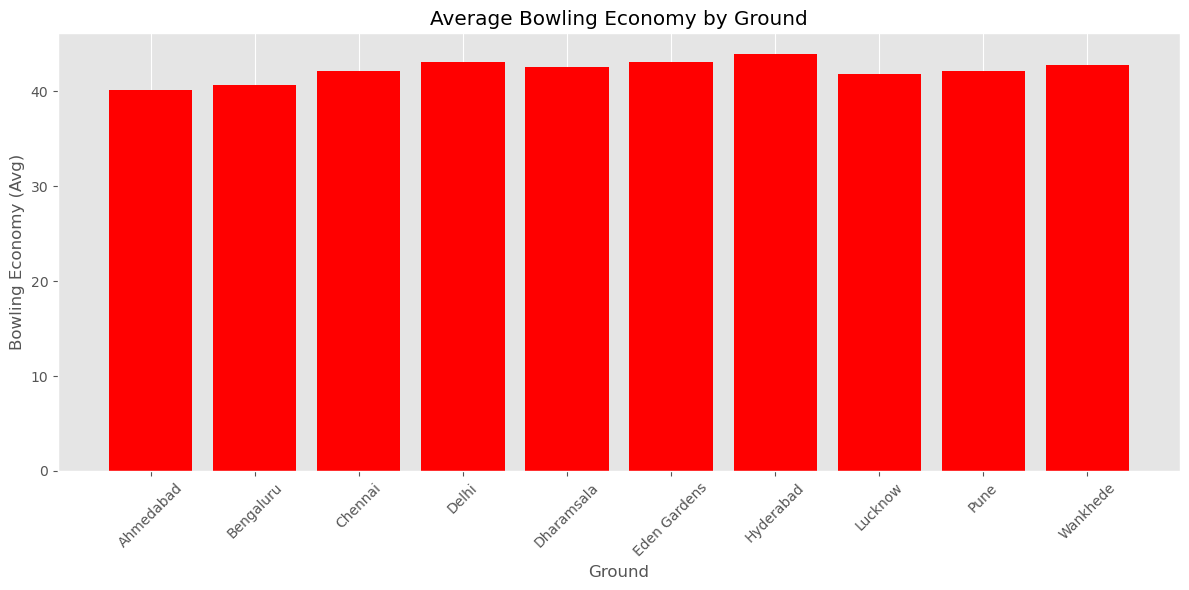

In [159]:
bowling_by_ground = bowler_df.groupby('ground').agg(
    bowling_eco_avg=('bowling_eco_avg', 'mean'),
    bowling_strike_rate=('bowling_strike_rate', 'mean')
)

fig, (ax1) = plt.subplots(1, 1, figsize=(12, 6))  
ax1.bar(bowling_by_ground.index, bowling_by_ground['bowling_eco_avg'], color='red')
ax1.set_xlabel('Ground')
ax1.set_ylabel('Bowling Economy (Avg)')
ax1.set_title('Average Bowling Economy by Ground')
ax1.grid(axis='y')  
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

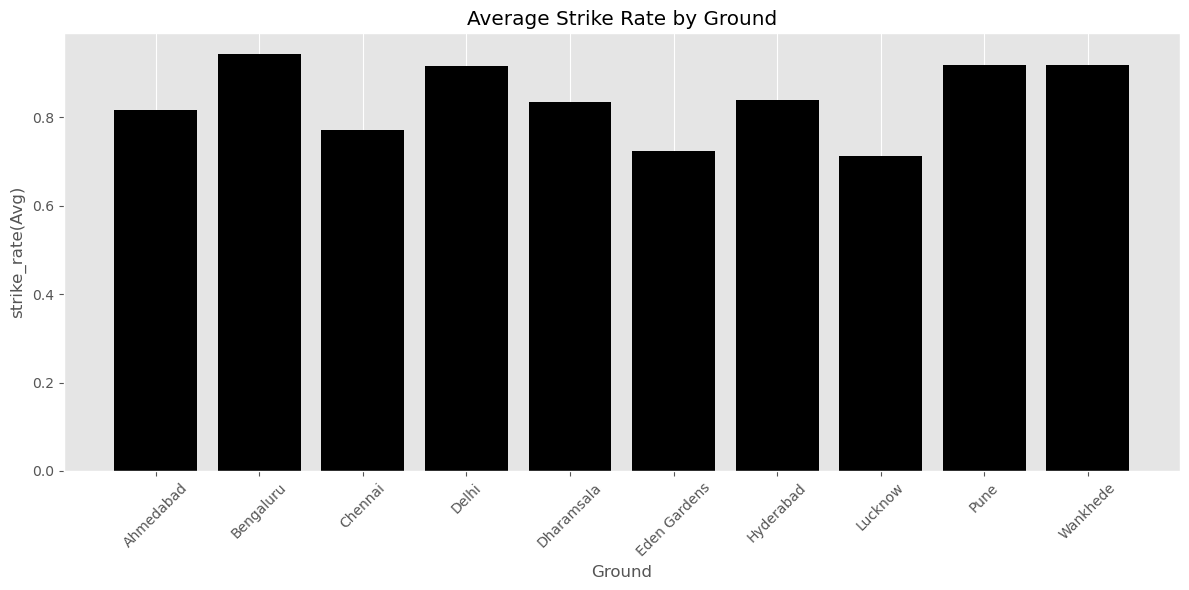

In [160]:
batting_by_ground = batsman_df.groupby('ground').agg(
    strike_rate=('strike_rate', 'mean'),
    batting_average=('batting_average', 'mean')
)

fig, (ax1) = plt.subplots(1, 1, figsize=(12, 6))  
ax1.bar(batting_by_ground.index, batting_by_ground['strike_rate'], color='black')
ax1.set_xlabel('Ground')
ax1.set_ylabel('strike_rate(Avg)')
ax1.set_title('Average Strike Rate by Ground')
ax1.grid(axis='y')  
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [91]:
bowler_df['start_date']=df[df['bat_or_bowl']=='bowl']['start_date']
bowler_df

,team,player,bb_bf,bat_or_bowl,wkts,overs,mdns,econ,bowling_eco,bowling_eco_avg,bowling_strike_rate,ground,start_date
0,PAK,Shaheen Shah Afridi (PAK),60,bowl,3.0,10.0,0.0,4.50,45.00,53.431111,20.0,Chennai,27-Oct-23
1,ENG,DJ Willey (ENG),60,bowl,3.0,10.0,2.0,4.50,45.00,43.150000,20.0,Lucknow,29-Oct-23
2,NZ,MJ Henry (NZ),60,bowl,3.0,10.0,1.0,4.80,48.00,44.481857,20.0,Ahmedabad,5-Oct-23
3,NZ,LH Ferguson (NZ),60,bowl,3.0,10.0,0.0,4.90,49.00,42.981429,20.0,Chennai,13-Oct-23
4,AFG,Noor Ahmad (AFG),60,bowl,3.0,10.0,0.0,4.90,49.00,45.480000,20.0,Chennai,23-Oct-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1403,NZ,MJ Santner (NZ),60,bowl,0.0,10.0,1.0,5.10,51.00,44.759200,inf,Wankhede,15-Nov-23
1404,AUS,A Zampa (AUS),42,bowl,0.0,7.0,0.0,7.85,54.95,47.085000,inf,Eden Gardens,16-Nov-23
1405,NZ,R Ravindra (NZ),42,bowl,0.0,7.0,0.0,8.57,59.99,43.571333,inf,Wankhede,15-Nov-23
1406,IND,RA Jadeja (IND),60,bowl,0.0,10.0,0.0,6.30,63.00,35.193000,inf,Wankhede,15-Nov-23


In [92]:
batsman_df['start_date']=df[df['bat_or_bowl']=='bat']['start_date']
batsman_df


,team,player,bat_or_bowl,bb_bf,runs,runs_per_ball,inns,4s,6s,sr,not_out,strike_rate,batting_average,impact_score,ground,start_date
501,AUS,GJ Maxwell (AUS),bat,128,201,1.5703,2,21.0,10.0,157.03,1.0,1.570312,100.5,111.021094,Wankhede,7-Nov-23
502,SA,Q de Kock (SA),bat,140,174,1.2428,1,15.0,7.0,124.28,0.0,1.242857,174.0,122.172857,Wankhede,24-Oct-23
503,AUS,DA Warner (AUS),bat,124,163,1.3145,1,14.0,9.0,131.45,0.0,1.314516,163.0,114.494355,Bengaluru,20-Oct-23
504,NZ,DP Conway (NZ),bat,121,152,1.2561,2,19.0,3.0,125.61,1.0,1.256198,76.0,83.976860,Ahmedabad,5-Oct-23
505,ENG,DJ Malan (ENG),bat,107,140,1.3084,1,16.0,5.0,130.84,0.0,1.308411,140.0,98.392523,Dharamsala,10-Oct-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1380,AUS,GJ Maxwell (AUS),bat,5,1,0.2000,2,0.0,0.0,20.00,0.0,0.200000,0.5,0.610000,Eden Gardens,16-Nov-23
1381,NZ,TWM Latham (NZ),bat,2,0,0.0000,2,0.0,0.0,0.00,0.0,0.000000,0.0,0.000000,Wankhede,15-Nov-23
1382,SA,T Bavuma (SA),bat,4,0,0.0000,1,0.0,0.0,0.00,0.0,0.000000,0.0,0.000000,Eden Gardens,16-Nov-23
1383,SA,M Jansen (SA),bat,1,0,0.0000,1,0.0,0.0,0.00,0.0,0.000000,0.0,0.000000,Eden Gardens,16-Nov-23


In [93]:
player_averages = batsman_df.groupby('player')['strike_rate'].mean()

top_10_players = player_averages.sort_values(ascending=False).head(10).index.tolist()
top_10_players

['DJ Willey (ENG)',
 'AK Markram (SA)',
 'HH Pandya (IND)',
 'RJW Topley (ENG)',
 'SA Yadav (IND)',
 'RG Sharma (IND)',
 'DA Miller (SA)',
 'H Klaasen (SA)',
 'RA Jadeja (IND)',
 'MP Stoinis (AUS)']

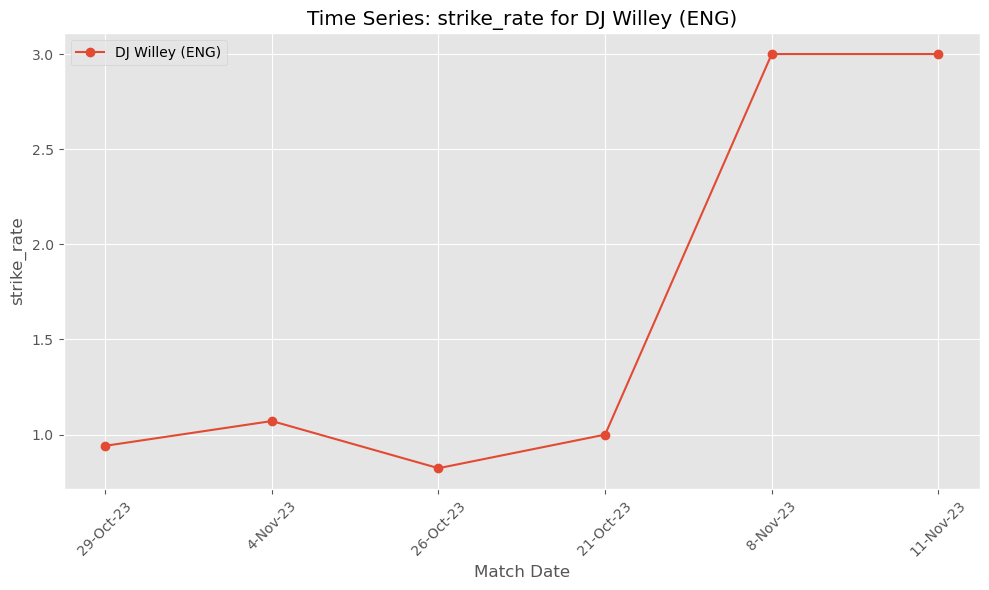

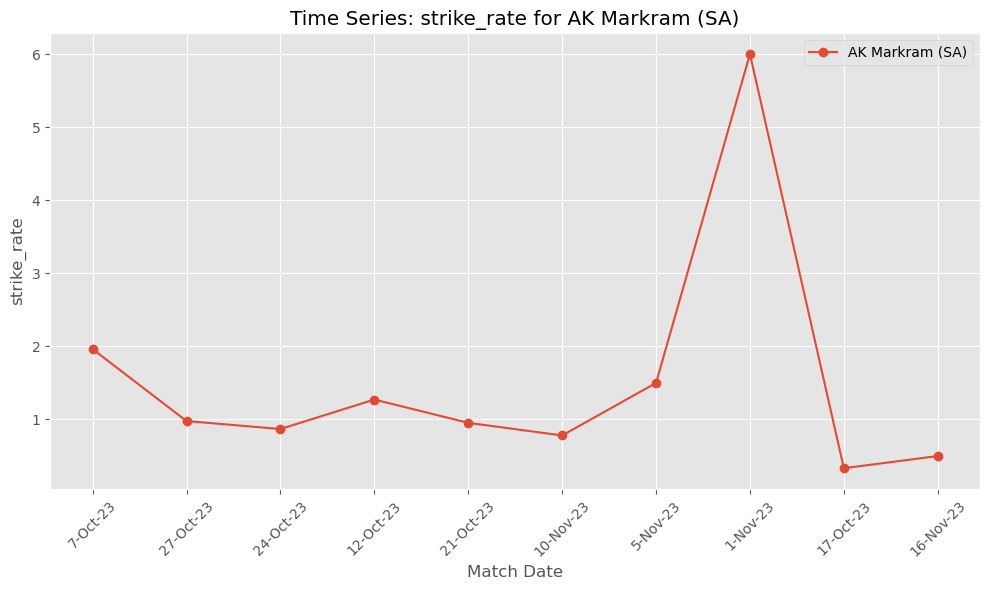

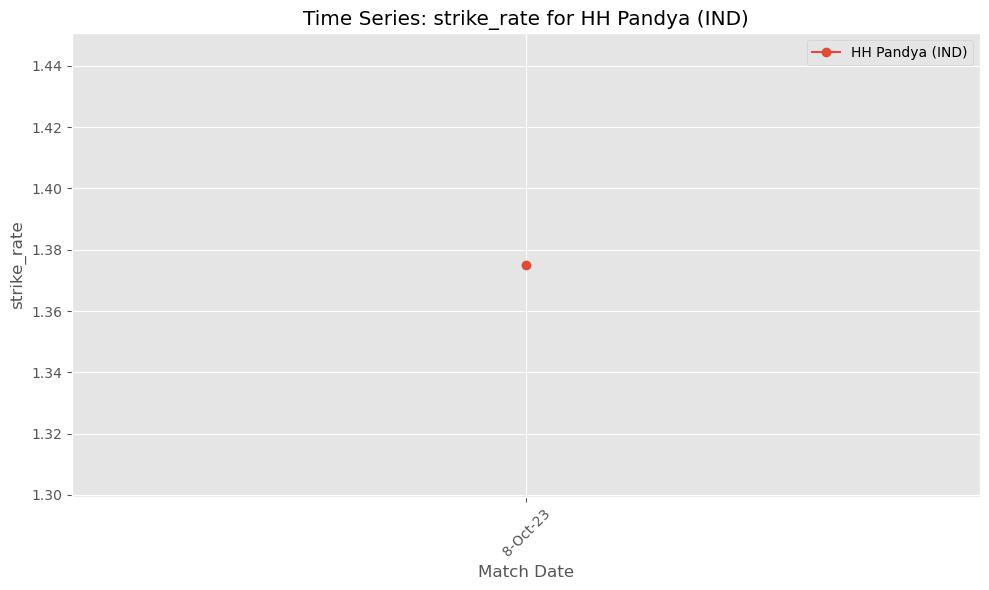

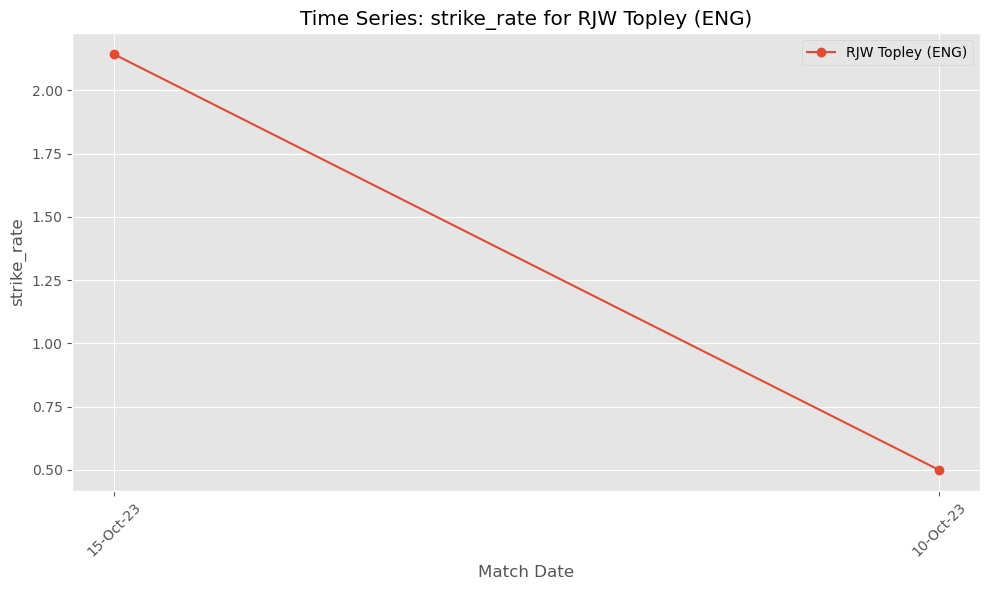

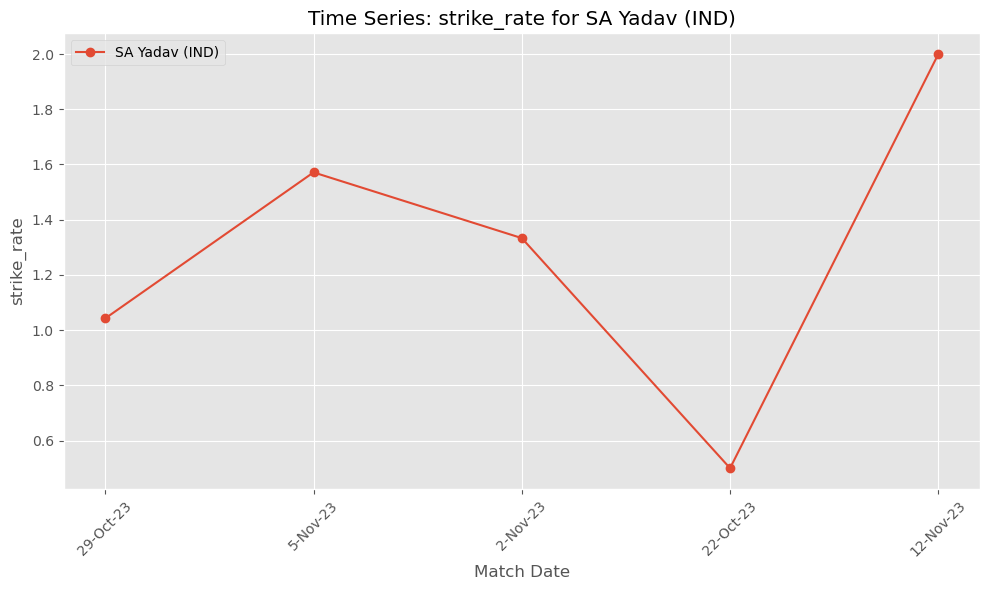

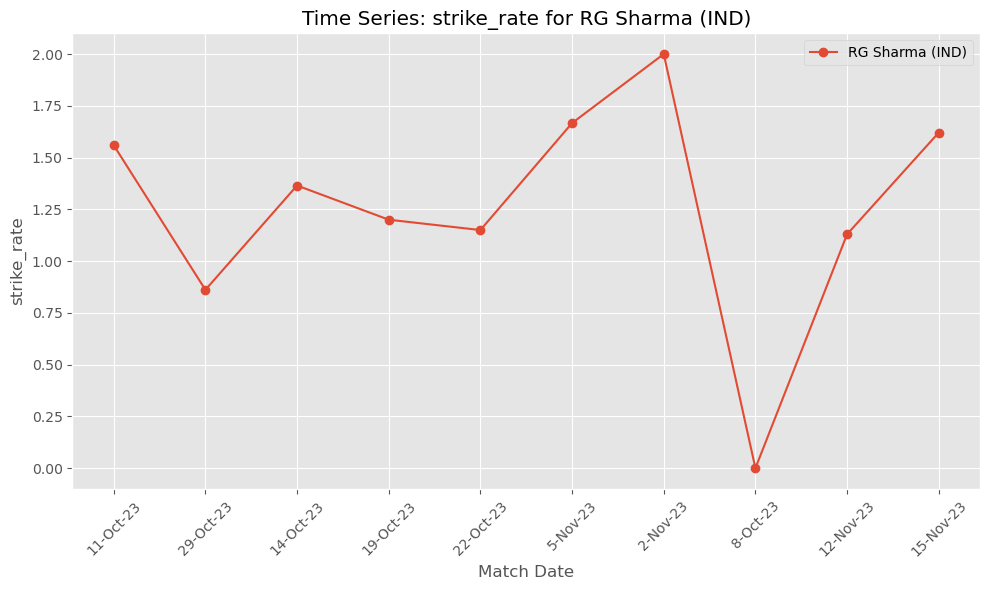

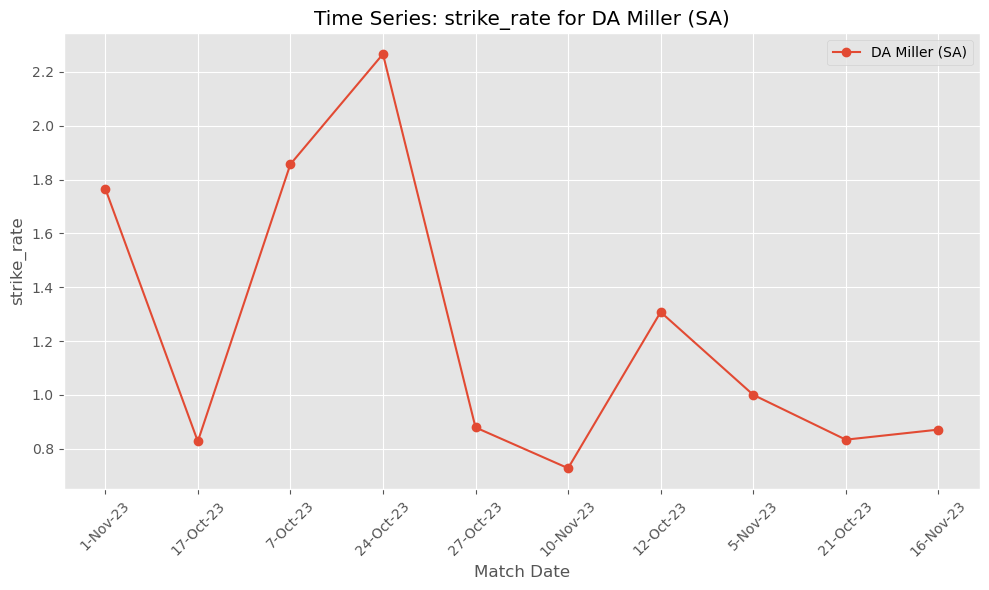

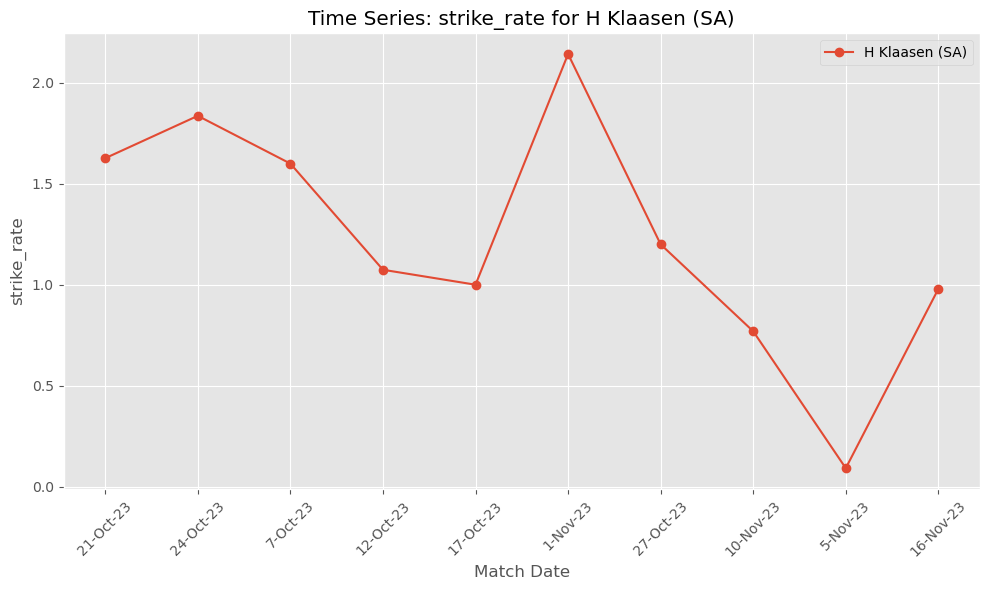

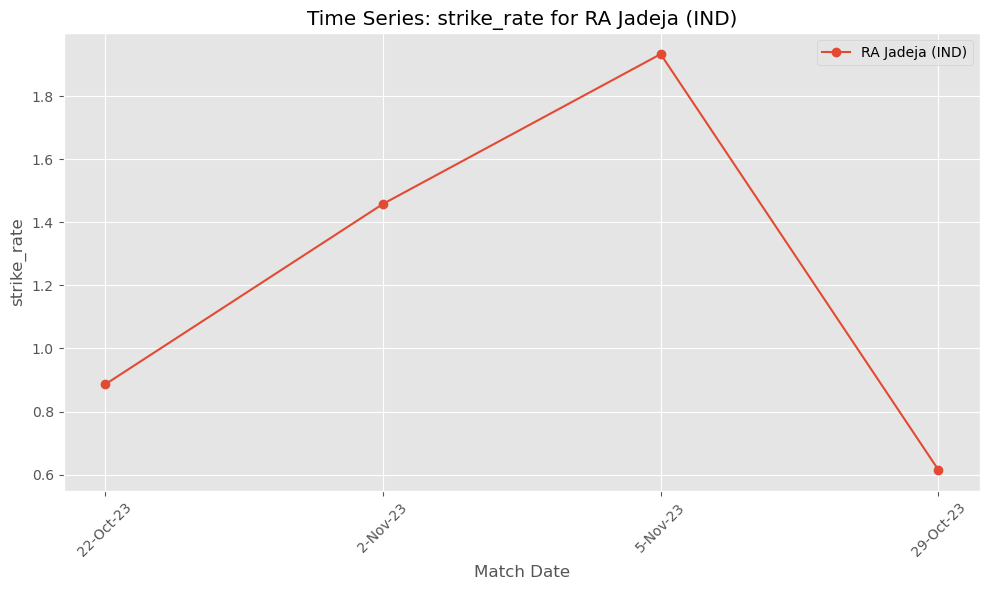

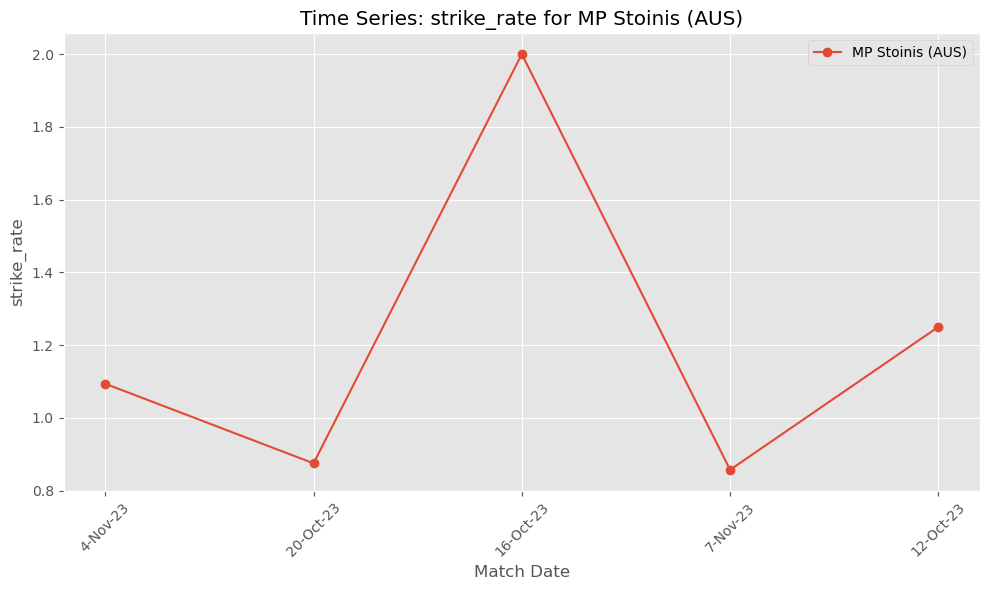

In [94]:
top_players_df = batsman_df[batsman_df['player'].isin(top_10_players)]

def plot_time_series(player_data, metric_name):
  plt.figure(figsize=(10, 6))
  plt.plot(player_data['start_date'], player_data[metric_name], marker='o', linestyle='-', label=player_data['player'].iloc[0])  # Adjust label
  plt.xlabel('Match Date')
  plt.ylabel(metric_name)
  plt.title(f'Time Series: {metric_name} for {player_data["player"].iloc[0]}')
  plt.grid(True)
  plt.legend()
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()

for player in top_10_players:
  player_data = top_players_df[top_players_df['player'] == player]
  plot_time_series(player_data, 'strike_rate')  


In [95]:
bowler_df['start_date'] = pd.to_datetime(bowler_df['start_date'])
bowler_df

,team,player,bb_bf,bat_or_bowl,wkts,overs,mdns,econ,bowling_eco,bowling_eco_avg,bowling_strike_rate,ground,start_date
0,PAK,Shaheen Shah Afridi (PAK),60,bowl,3.0,10.0,0.0,4.50,45.00,53.431111,20.0,Chennai,2023-10-27
1,ENG,DJ Willey (ENG),60,bowl,3.0,10.0,2.0,4.50,45.00,43.150000,20.0,Lucknow,2023-10-29
2,NZ,MJ Henry (NZ),60,bowl,3.0,10.0,1.0,4.80,48.00,44.481857,20.0,Ahmedabad,2023-10-05
3,NZ,LH Ferguson (NZ),60,bowl,3.0,10.0,0.0,4.90,49.00,42.981429,20.0,Chennai,2023-10-13
4,AFG,Noor Ahmad (AFG),60,bowl,3.0,10.0,0.0,4.90,49.00,45.480000,20.0,Chennai,2023-10-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1403,NZ,MJ Santner (NZ),60,bowl,0.0,10.0,1.0,5.10,51.00,44.759200,inf,Wankhede,2023-11-15
1404,AUS,A Zampa (AUS),42,bowl,0.0,7.0,0.0,7.85,54.95,47.085000,inf,Eden Gardens,2023-11-16
1405,NZ,R Ravindra (NZ),42,bowl,0.0,7.0,0.0,8.57,59.99,43.571333,inf,Wankhede,2023-11-15
1406,IND,RA Jadeja (IND),60,bowl,0.0,10.0,0.0,6.30,63.00,35.193000,inf,Wankhede,2023-11-15


In [96]:
batsman_df['start_date'] = pd.to_datetime(batsman_df['start_date'])
batsman_df

,team,player,bat_or_bowl,bb_bf,runs,runs_per_ball,inns,4s,6s,sr,not_out,strike_rate,batting_average,impact_score,ground,start_date
501,AUS,GJ Maxwell (AUS),bat,128,201,1.5703,2,21.0,10.0,157.03,1.0,1.570312,100.5,111.021094,Wankhede,2023-11-07
502,SA,Q de Kock (SA),bat,140,174,1.2428,1,15.0,7.0,124.28,0.0,1.242857,174.0,122.172857,Wankhede,2023-10-24
503,AUS,DA Warner (AUS),bat,124,163,1.3145,1,14.0,9.0,131.45,0.0,1.314516,163.0,114.494355,Bengaluru,2023-10-20
504,NZ,DP Conway (NZ),bat,121,152,1.2561,2,19.0,3.0,125.61,1.0,1.256198,76.0,83.976860,Ahmedabad,2023-10-05
505,ENG,DJ Malan (ENG),bat,107,140,1.3084,1,16.0,5.0,130.84,0.0,1.308411,140.0,98.392523,Dharamsala,2023-10-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1380,AUS,GJ Maxwell (AUS),bat,5,1,0.2000,2,0.0,0.0,20.00,0.0,0.200000,0.5,0.610000,Eden Gardens,2023-11-16
1381,NZ,TWM Latham (NZ),bat,2,0,0.0000,2,0.0,0.0,0.00,0.0,0.000000,0.0,0.000000,Wankhede,2023-11-15
1382,SA,T Bavuma (SA),bat,4,0,0.0000,1,0.0,0.0,0.00,0.0,0.000000,0.0,0.000000,Eden Gardens,2023-11-16
1383,SA,M Jansen (SA),bat,1,0,0.0000,1,0.0,0.0,0.00,0.0,0.000000,0.0,0.000000,Eden Gardens,2023-11-16


In [97]:
batsman_analysis=batsman_df.drop(columns=['bat_or_bowl', 'bb_bf', 'runs_per_ball',
       'inns', '4s', '6s', 'sr', 'not_out', 'impact_score', 'ground'])
batsman_analysis

,team,player,runs,strike_rate,batting_average,start_date
501,AUS,GJ Maxwell (AUS),201,1.570312,100.5,2023-11-07
502,SA,Q de Kock (SA),174,1.242857,174.0,2023-10-24
503,AUS,DA Warner (AUS),163,1.314516,163.0,2023-10-20
504,NZ,DP Conway (NZ),152,1.256198,76.0,2023-10-05
505,ENG,DJ Malan (ENG),140,1.308411,140.0,2023-10-10
...,...,...,...,...,...,...
1380,AUS,GJ Maxwell (AUS),1,0.200000,0.5,2023-11-16
1381,NZ,TWM Latham (NZ),0,0.000000,0.0,2023-11-15
1382,SA,T Bavuma (SA),0,0.000000,0.0,2023-11-16
1383,SA,M Jansen (SA),0,0.000000,0.0,2023-11-16


In [98]:
batsman_analysis_grouped=batsman_analysis.groupby('team')

In [99]:
bowler_analysis=bowler_df.drop(columns=['bb_bf', 'bat_or_bowl','mdns',
       'econ', 'bowling_eco', 'ground'])
bowler_analysis

,team,player,wkts,overs,bowling_eco_avg,bowling_strike_rate,start_date
0,PAK,Shaheen Shah Afridi (PAK),3.0,10.0,53.431111,20.0,2023-10-27
1,ENG,DJ Willey (ENG),3.0,10.0,43.150000,20.0,2023-10-29
2,NZ,MJ Henry (NZ),3.0,10.0,44.481857,20.0,2023-10-05
3,NZ,LH Ferguson (NZ),3.0,10.0,42.981429,20.0,2023-10-13
4,AFG,Noor Ahmad (AFG),3.0,10.0,45.480000,20.0,2023-10-23
...,...,...,...,...,...,...,...
1403,NZ,MJ Santner (NZ),0.0,10.0,44.759200,inf,2023-11-15
1404,AUS,A Zampa (AUS),0.0,7.0,47.085000,inf,2023-11-16
1405,NZ,R Ravindra (NZ),0.0,7.0,43.571333,inf,2023-11-15
1406,IND,RA Jadeja (IND),0.0,10.0,35.193000,inf,2023-11-15


In [100]:
team_groups = batsman_analysis.groupby('team')

def calculate_performance(group):
  
  performance = group.groupby(pd.Grouper(key='start_date', freq='10D'))['strike_rate'].mean()
  return performance


performance_over_time = team_groups.apply(calculate_performance)
performance_over_time = performance_over_time.reset_index()


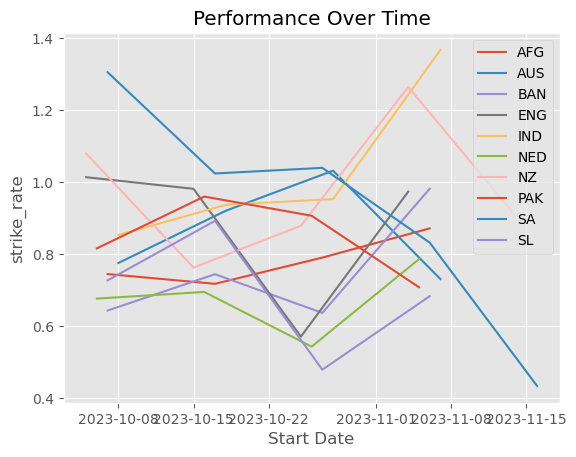

In [101]:
for team in performance_over_time['team'].unique():
  team_data = performance_over_time[performance_over_time['team'] == team]
  plt.plot(team_data['start_date'], team_data['strike_rate'], label=team)

plt.xlabel('Start Date')
plt.ylabel('strike_rate')  
plt.title('Performance Over Time')
plt.legend()
plt.grid(True)
plt.show()


In [102]:
bowler_groups = bowler_analysis.groupby('team')

def calculate_performance(group):
  
  performance = group.groupby(pd.Grouper(key='start_date', freq='10D'))['bowling_eco_avg'].mean()
  return performance


performance_over_time = bowler_groups.apply(calculate_performance)
performance_over_time = performance_over_time.reset_index()

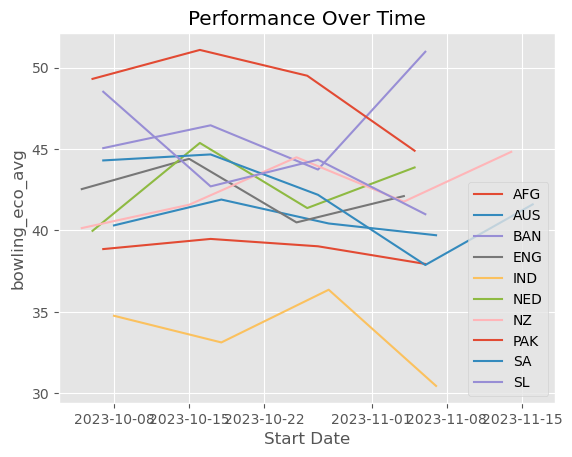

In [103]:
for team in performance_over_time['team'].unique():
  team_data = performance_over_time[performance_over_time['team'] == team]
  plt.plot(team_data['start_date'], team_data['bowling_eco_avg'], label=team)

plt.xlabel('Start Date')
plt.ylabel('bowling_eco_avg') 
plt.title('Performance Over Time')
plt.legend()
plt.grid(True)
plt.show()


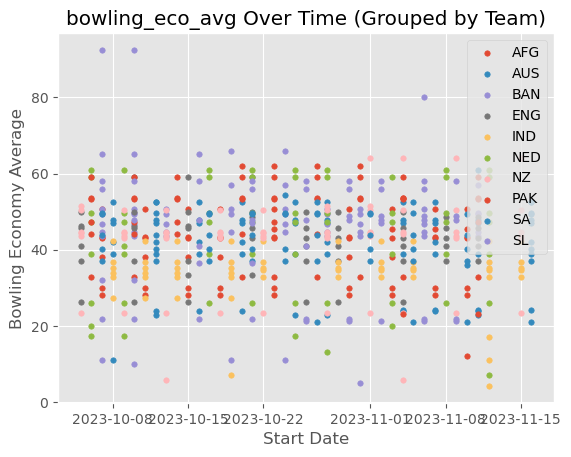

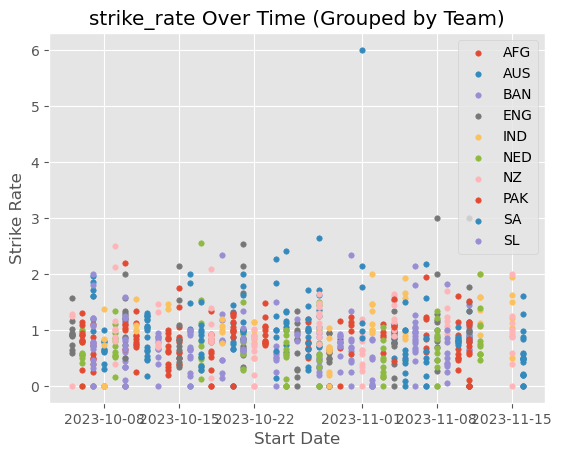

<Figure size 640x480 with 0 Axes>

In [104]:
def plot_performance_over_time(data, metric_name, y_label, markersize=15):
  for team in data.groups:  
    team_data = data.get_group(team)  
    plt.scatter(team_data['start_date'], team_data[metric_name], label=team, s=markersize)
  plt.xlabel('Start Date')
  plt.ylabel(y_label)
  plt.title(f'{metric_name} Over Time (Grouped by Team)')
  plt.legend()
  plt.grid(True)
  plt.show()
  plt.clf()  


plot_performance_over_time(bowler_analysis.groupby('team'), 'bowling_eco_avg', 'Bowling Economy Average')
plot_performance_over_time(batsman_analysis.groupby('team'), 'strike_rate', 'Strike Rate')


### Are teams becoming more economical bowlers or more aggressive batsmen?
As it can be seen, Teams are becoming more economical bowlers than more aggressive batsmen

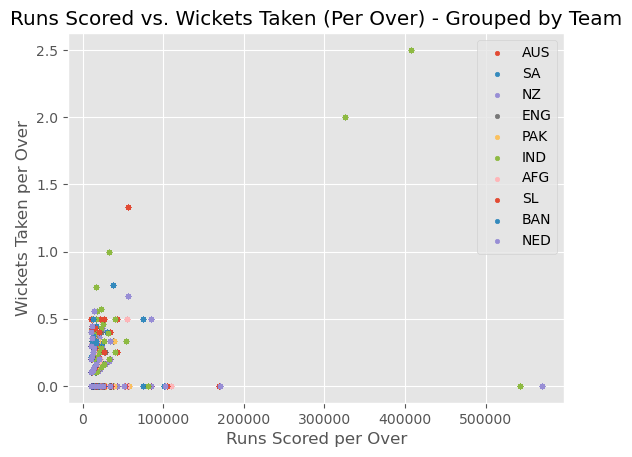

In [105]:
def plot_runs_vs_wickets(batsman_data, bowler_data):
  
  team_data = batsman_data.merge(bowler_data, on='team')  

  for team in team_data['team'].unique():
    team_data_filtered = team_data[team_data['team'] == team]
    total_runs = team_data_filtered['runs'].sum()  
    runs_per_over = total_runs / team_data_filtered['overs']
    wickets_per_over = team_data_filtered['wkts'] / team_data_filtered['overs']
    plt.scatter(runs_per_over, wickets_per_over, label=team, s=10)

  plt.xlabel('Runs Scored per Over')
  plt.ylabel('Wickets Taken per Over')
  plt.title('Runs Scored vs. Wickets Taken (Per Over) - Grouped by Team')
  plt.legend()
  plt.grid(True)
  plt.show()

plot_runs_vs_wickets(batsman_analysis, bowler_analysis)


###  Are teams scoring more runs at the cost of losing wickets faster, or vice versa?
There's a balance in both metrics for almost all teams, except team INDIA, they have a linear relation among their metrics

In [106]:
df['ground'].unique()

array(['Chennai', 'Lucknow', 'Ahmedabad', 'Delhi', 'Pune', 'Dharamsala',
       'Eden Gardens', 'Bengaluru', 'Wankhede', 'Hyderabad'], dtype=object)

In [116]:
import plotly.express as px
match_count = df['ground'].value_counts()

latitudes = {  
    'Chennai': 12.9716,
    'Lucknow': 26.8467,
    'Ahmedabad': 23.0225,
    'Delhi': 28.6139,
    'Pune': 18.5204,
    'Dharamsala': 32.2008,
    'Eden Gardens':22.5726,
    'Bengaluru':12.9716,
    'Wankhede': 19.0760,
    'Hyderabad':17.4102
}

city_list = []
latitude_list = []
for city in match_count.index:
  latitude = latitudes.get(city)
  if latitude:  
    city_list.append(city)
    latitude_list.append(latitude)

df_geo = pd.DataFrame({'city': city_list, 'latitude': latitude_list})

df_geo


,city,latitude
0,Dharamsala,32.2008
1,Eden Gardens,22.5726
2,Delhi,28.6139
3,Lucknow,26.8467
4,Wankhede,19.0760
5,Chennai,12.9716
6,Bengaluru,12.9716
7,Pune,18.5204
8,Ahmedabad,23.0225
9,Hyderabad,17.4102


In [118]:
print(match_count.to_frame(name='match_count').head()) 

              match_count
Dharamsala            156
Eden Gardens          156
Delhi                 153
Lucknow               149
Wankhede              148


In [137]:
print(df_geo.head())

           city  latitude
0    Dharamsala   32.2008
1  Eden Gardens   22.5726
2         Delhi   28.6139
3       Lucknow   26.8467
4      Wankhede   19.0760


In [138]:
df_match_count = match_count.to_frame(name='match_count').reset_index()
df_match_count = df_match_count.rename(columns={'index': 'city'})
df_match_count

,city,match_count
0,Dharamsala,156
1,Eden Gardens,156
2,Delhi,153
3,Lucknow,149
4,Wankhede,148
5,Chennai,145
6,Bengaluru,144
7,Pune,142
8,Ahmedabad,117
9,Hyderabad,98


In [134]:
longitudes = [76.32,88.34,77.24,80.94,72.82,80.27,77.59,73.70,72.59,78.55]


In [136]:
df_merged = pd.merge(df_match_count, df_geo, how='left', on='city')
df_merged['longitude'] = longitudes
df_merged

,city,match_count,latitude,longitude
0,Dharamsala,156,32.2008,76.32
1,Eden Gardens,156,22.5726,88.34
2,Delhi,153,28.6139,77.24
3,Lucknow,149,26.8467,80.94
4,Wankhede,148,19.0760,72.82
5,Chennai,145,12.9716,80.27
6,Bengaluru,144,12.9716,77.59
7,Pune,142,18.5204,73.70
8,Ahmedabad,117,23.0225,72.59
9,Hyderabad,98,17.4102,78.55


In [169]:
import plotly.io as pio
pio.renderers.default = 'browser'
fig = px.scatter_mapbox(
    df_merged,
    lat='latitude',
    lon='longitude',  
    hover_name='city',
    hover_data=['match_count'],
    color='match_count',
    mapbox_style="open-street-map",
    zoom=3,
    size='match_count'
)
fig.update_layout(xaxis_showticklabels=False)
fig.update_layout(title_text='World Cup 2023 Matches by City')

fig.show()


In [143]:
team_df

,team,Total Runs Scored,Total Fours,Total Sixes,Highest Individual Score,Total Wickets Taken,Average Economy Rate,Total Balls Bowled,Total overs played,Average Batting Strike Rate,Total Boundaries,Boundary Perctange
0,AFG,1990,178.0,42.0,129,53.0,5.763818,2394.6,399.1,83.193980,220.0,0.888566
1,AUS,2722,265.0,92.0,201,77.0,5.661129,2689.8,448.3,97.667743,357.0,1.441900
2,BAN,1944,188.0,43.0,111,51.0,6.095769,2382.0,397.0,79.056527,231.0,0.932994
3,ENG,2135,216.0,51.0,140,65.0,6.068302,2332.2,388.7,93.763724,267.0,1.078396
4,IND,2810,265.0,89.0,131,94.0,4.963793,2492.4,415.4,104.655493,354.0,1.429783
5,NED,1728,163.0,33.0,78,63.0,6.170339,2497.2,416.2,75.130435,196.0,0.791631
6,NZ,2712,265.0,82.0,152,71.0,6.237143,2695.2,449.2,103.669725,347.0,1.401511
7,PAK,2220,220.0,60.0,131,65.0,6.286923,2475.6,412.6,96.145518,280.0,1.130902
8,SA,2773,243.0,99.0,174,88.0,5.682778,2547.0,424.5,99.497668,342.0,1.381316
9,SL,1942,201.0,45.0,122,50.0,6.606111,2253.0,375.5,86.043420,246.0,0.993578
